### Importing Libraries and Dataset

In [1]:
# libraries for analysis
import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# tensorflow libraries for neural networks
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import schedules

# Evaluation libraries

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supervised learning libraries
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import warnings
  
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore')

<h1><div style="text-align: justify"> Data Pre-processing </div></h1>


* The data as sourced from UCI repository. <br>
* The file is a .arff file. <br>
* Below function is used to convert .arff file to csv <br>
* [source: Convert-Arff-to-CSV](https://github.com/mfahadzafar/Convert-Arff-to-CSV/blob/master/arffToCsv.py)


# Attributes
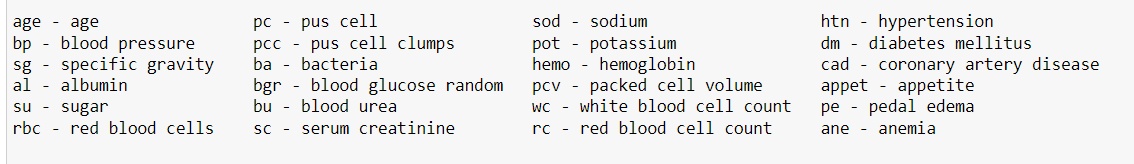






* &emsp; Converting Arff to CSV
* &emsp; Importing CSV File

In [2]:
#function to convert Arff file to CSV
def getCSVFromArff(fileName):
    with open(fileName + '.arff', 'r') as fin:
        data = fin.read().splitlines(True)
    i = 0
    cols = []
    for line in data:
        line = line.lower()
        if ('@data' in line):
                i+= 1
                break
        else:
            #print line
            i+= 1
            if (line.startswith('@attribute')):
                if('{' in line):
                    cols.append(line[11:line.index('{')-1])
                else:
                    cols.append(line[11:line.index(' ', 11)])
        headers = ",".join(cols)
    with open(fileName + '.csv', 'w') as fout:
        fout.write(headers)
        fout.write('\n')
        fout.writelines(data[i:])

getCSVFromArff("chronic_kidney_disease_full")

In [3]:
df = pd.read_csv("chronic_kidney_disease_full.csv", on_bad_lines='skip')
df

'age' 'bp'   'sg' 'al' 'su'   'rbc'      'pc'       'pcc'        'ba'  \
0      48   80  1.020    1    0       ?    normal  notpresent  notpresent   
1       7   50  1.020    4    0       ?    normal  notpresent  notpresent   
2      62   80  1.010    2    3  normal    normal  notpresent  notpresent   
3      48   70  1.005    4    0  normal  abnormal     present  notpresent   
4      51   80  1.010    2    0  normal    normal  notpresent  notpresent   
..    ...  ...    ...  ...  ...     ...       ...         ...         ...   
392    55   80  1.020    0    0  normal    normal  notpresent  notpresent   
393    42   70  1.025    0    0  normal    normal  notpresent  notpresent   
394    12   80  1.020    0    0  normal    normal  notpresent  notpresent   
395    17   60  1.025    0    0  normal    normal  notpresent  notpresent   
396    58   80  1.025    0    0  normal    normal  notpresent  notpresent   

    'bgr'  ... 'pcv' 'wbcc' 'rbcc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane' 'class'  
0     121  ...    44   7800    5.2   yes  yes    no    good   no    no     ckd  
1       ?  ...    38   6000      ?    no   no    no    good   no    no     ckd  
2     423  ...    31   7500      ?    no  yes    no    poor   no   yes     ckd  
3     117  ...    32   6700    3.9   yes   no    no    poor  yes   yes     ckd  
4     106  ...    35   7300    4.6    no   no    no    good   no    no     ckd  
..    ...  ...   ...    ...    ...   ...  ...   ...     ...  ...   ...     ...  
392   140  ...    47   6700    4.9    no   no    no    good   no    no  notckd  
393    75  ...    54   7800    6.2    no   no    no    good   no    no  notckd  
394   100  ...    49   6600    5.4    no   no    no    good   no    no  notckd  
395   114  ...    51   7200    5.9    no   no    no    good   no    no  notckd  
396   131  ...    53   6800    6.1    no   no    no    good   no    no  notckd  

[397 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   'age'    397 non-null    object
 1   'bp'     397 non-null    object
 2   'sg'     397 non-null    object
 3   'al'     397 non-null    object
 4   'su'     397 non-null    object
 5   'rbc'    397 non-null    object
 6   'pc'     397 non-null    object
 7   'pcc'    397 non-null    object
 8   'ba'     397 non-null    object
 9   'bgr'    397 non-null    object
 10  'bu'     397 non-null    object
 11  'sc'     397 non-null    object
 12  'sod'    397 non-null    object
 13  'pot'    397 non-null    object
 14  'hemo'   397 non-null    object
 15  'pcv'    397 non-null    object
 16  'wbcc'   397 non-null    object
 17  'rbcc'   397 non-null    object
 18  'htn'    397 non-null    object
 19  'dm'     397 non-null    object
 20  'cad'    397 non-null    object
 21  'appet'  397 non-null    object
 22  'p

### Renaming the Headers

In [5]:
headers = [ 'age','blood_pressure', 'specific_gravity', 'albumin','sugar','red_blood_cells','pus_cell',
           'pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine',
           'sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
           'hypertension','diabetes_mellitus','coronary_artery_disease', 'appetite','pedal_edema' ,'anemia',
           'class']

In [6]:
df = pd.read_csv("chronic_kidney_disease_full.csv", on_bad_lines='skip', names = headers)

In [7]:
df = df.iloc[1: , :].reset_index(drop=True) # removing the first row with the previous header by slicing

df.head()

age blood_pressure specific_gravity albumin sugar red_blood_cells  pus_cell  \
0  48             80            1.020       1     0               ?    normal   
1   7             50            1.020       4     0               ?    normal   
2  62             80            1.010       2     3          normal    normal   
3  48             70            1.005       4     0          normal  abnormal   
4  51             80            1.010       2     0          normal    normal   

  pus_cell_clumps    bacteria blood_glucose_random  ... packed_cell_volume  \
0      notpresent  notpresent                  121  ...                 44   
1      notpresent  notpresent                    ?  ...                 38   
2      notpresent  notpresent                  423  ...                 31   
3         present  notpresent                  117  ...                 32   
4      notpresent  notpresent                  106  ...                 35   

  white_blood_cell_count red_blood_cell_count hypertension diabetes_mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                    ?           no                no   
2                   7500                    ?           no               yes   
3                   6700                  3.9          yes                no   
4                   7300                  4.6           no                no   

  coronary_artery_disease appetite pedal_edema anemia class  
0                      no     good          no     no   ckd  
1                      no     good          no     no   ckd  
2                      no     poor          no    yes   ckd  
3                      no     poor         yes    yes   ckd  
4                      no     good          no     no   ckd  

[5 rows x 25 columns]

In [8]:
# # replacing the space between column names
# df.columns = df.columns.str.replace(" ","_")

In [9]:
#inpecting dataframe for null/nan/blank values
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [10]:
df.describe()

age blood_pressure specific_gravity albumin sugar red_blood_cells  \
count   397            397              397     397   397             397   
unique   76             11                6       7     7               3   
top      60             80            1.020       0     0          normal   
freq     19            116              105     197   289             200   

       pus_cell pus_cell_clumps    bacteria blood_glucose_random  ...  \
count       397             397         397                  397  ...   
unique        3               3           3                  146  ...   
top      normal      notpresent  notpresent                    ?  ...   
freq        257             352         371                   43  ...   

       packed_cell_volume white_blood_cell_count red_blood_cell_count  \
count                 397                    397                  397   
unique                 45                     93                   50   
top                     ?                      ?                    ?   
freq                   69                    104                  129   

       hypertension diabetes_mellitus coronary_artery_disease appetite  \
count           397               397                     397      397   
unique            3                 6                       4        3   
top              no                no                      no     good   
freq            249               257                     359      314   

       pedal_edema anemia class  
count          397    397   397  
unique           3      3     3  
top             no     no   ckd  
freq           321    336   246  

[4 rows x 25 columns]

# Inspecting and Handling Missing Values
* The missing values in this data is represented by the symbol ?
* Columns such as blood glucose random, blood urea, sodium, potassium, hemoglobin, packed cell volume, <br> white blood cell count, red blood cell count, mode of some of the columns is the symbol?

### Replacing columns with numeric observations with the mode

In [11]:
# Creating a list of series
series = [
    df["age"],
    df["blood_pressure"],
    df["specific_gravity"],
    df["albumin"],
    df["sugar"],
    df["hypertension"],
    df["diabetes_mellitus"],
    df["coronary_artery_disease"],
    df["appetite"],
    df["pedal_edema"],
    df["anemia"],
    df["red_blood_cells"],
    df["pus_cell"],
    df["pus_cell_clumps"],
    df["bacteria"],
    df["serum_creatinine"],
]

# replacing the symbol ? in the list (series) above with the mode of each series in the function  below
def odd_value(series):
    for element in series:
        for i in range(len(element)):
            if element[i] == '?':
                i = element.replace(['?'], element.mode(), inplace=True)
                

        print(element)
        
odd_value(series) # passing the series list into our function

0      48
1       7
2      62
3      48
4      51
       ..
392    55
393    42
394    12
395    17
396    58
Name: age, Length: 397, dtype: object
0      80
1      50
2      80
3      70
4      80
       ..
392    80
393    70
394    80
395    60
396    80
Name: blood_pressure, Length: 397, dtype: object
0      1.020
1      1.020
2      1.010
3      1.005
4      1.010
       ...  
392    1.020
393    1.025
394    1.020
395    1.025
396    1.025
Name: specific_gravity, Length: 397, dtype: object
0      1
1      4
2      2
3      4
4      2
      ..
392    0
393    0
394    0
395    0
396    0
Name: albumin, Length: 397, dtype: object
0      0
1      0
2      3
3      0
4      0
      ..
392    0
393    0
394    0
395    0
396    0
Name: sugar, Length: 397, dtype: object
0      yes
1       no
2       no
3      yes
4       no
      ... 
392     no
393     no
394     no
395     no
396     no
Name: hypertension, Length: 397, dtype: object
0      yes
1       no
2      yes
3       no
4      

In [12]:
df.loc[[292]]

age blood_pressure specific_gravity albumin sugar red_blood_cells  \
292  75             60            1.020       0     0          normal   

    pus_cell pus_cell_clumps    bacteria blood_glucose_random  ...  \
292   normal      notpresent  notpresent                  110  ...   

    packed_cell_volume white_blood_cell_count red_blood_cell_count  \
292                 40                   8300                  5.8   

    hypertension diabetes_mellitus coronary_artery_disease appetite  \
292           no                no                      no     good   

    pedal_edema anemia   class  
292          no     no  notckd  

[1 rows x 25 columns]

In [13]:
#  the series blood glucose random, blood urea, sodium, potassium, hemoglobin, 
# ... packed cell volume, white blood cell count, red blood cell count have their mode as the symbol ?
# 1. To tackle this we will extract the part of each series below without the symbol and assign to a unique variable
# 2. We will derive the mode of the values in each variable and 
# 3. We will assign the mode to the overall series to replace "?".

# assigning series without ? to a variable
bg = df[df["blood_glucose_random"] != "?"]
bu = df[df["blood_urea"] != "?"]
so = df[df["sodium"] != "?"]

k = df[ df["potassium"] != "?"]
hg = df[df["hemoglobin"] != "?"]
pcv = df[df["packed_cell_volume"] != "?"]

wbc = df[df["white_blood_cell_count"] != "?"]
rbc = df[df["red_blood_cell_count"] != "?"]


# mode of the series
print(bg["blood_glucose_random"].mode())
print(bu["blood_urea"].mode())
print(so["sodium"].mode())

print(k["potassium"].mode())
print(hg["hemoglobin"].mode())
print(pcv["packed_cell_volume"].mode())

print(wbc["white_blood_cell_count"].mode())
print(rbc["red_blood_cell_count"].mode())

0    99
Name: blood_glucose_random, dtype: object
0    46
Name: blood_urea, dtype: object
0    135
Name: sodium, dtype: object
0    3.5
1    5.0
Name: potassium, dtype: object
0    15.0
Name: hemoglobin, dtype: object
0    41
Name: packed_cell_volume, dtype: object
0    9800
Name: white_blood_cell_count, dtype: object
0    5.2
Name: red_blood_cell_count, dtype: object


In [14]:
# replacing ? in the dataframe with the mode derived above 
df["blood_glucose_random"].replace(["?"], 99, inplace=True)
df["blood_urea"].replace(["?"], 46, inplace=True)
df["sodium"].replace(["?"], 135, inplace=True)

df["potassium"].replace(["?"], 3.5, inplace=True)
df["hemoglobin"].replace(["?"], 15.0, inplace=True)

# White blood cell count has an odd value "\t?" we need to remove
df["white_blood_cell_count"] = df["white_blood_cell_count"].str.replace("\t?","")
df["white_blood_cell_count"].replace(["?"], 9800, inplace=True)
df["white_blood_cell_count"].replace(["\t?"], 9800, inplace=True)
df["white_blood_cell_count"].fillna(9800, inplace=True)

# red blood cell count cleaning
df["red_blood_cell_count"].replace(["?"], 5.2, inplace=True)
df["red_blood_cell_count"].replace(["\t?"], 5.2, inplace=True)
df["red_blood_cell_count"].fillna(5.2, inplace=True)

In [15]:
# packed cell volume wrangling
df["packed_cell_volume"] = df["packed_cell_volume"].str.replace("\t?","")
df["packed_cell_volume"] = df["packed_cell_volume"].str.replace("\t","")
df["packed_cell_volume"].replace(["?"], 41, inplace=True)
df["packed_cell_volume"].fillna(41, inplace=True)

#### cleaning diabetes mellitus

In [16]:
df["diabetes_mellitus"].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes'], dtype=object)

In [17]:
df["diabetes_mellitus"] = df["diabetes_mellitus"].str.replace("\t","")

In [18]:
df["diabetes_mellitus"].unique()

array(['yes', 'no', ' yes'], dtype=object)

In [19]:
#removing the space beside " yes"
df["diabetes_mellitus"] = df["diabetes_mellitus"].str.replace(" ","")

In [20]:
df["diabetes_mellitus"].unique()

array(['yes', 'no'], dtype=object)

#### cleaning coronary_artery_disease

In [21]:
df["coronary_artery_disease"].unique()

array(['no', 'yes', '\tno'], dtype=object)

In [22]:
df["coronary_artery_disease"] = df["coronary_artery_disease"].str.replace("\t","")

In [23]:
df["coronary_artery_disease"].unique()

array(['no', 'yes'], dtype=object)

### Cleaning the error in label identified in "class"

In [24]:
df["class"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [25]:
df["class"].value_counts()

ckd       246
notckd    149
ckd\t       2
Name: class, dtype: int64

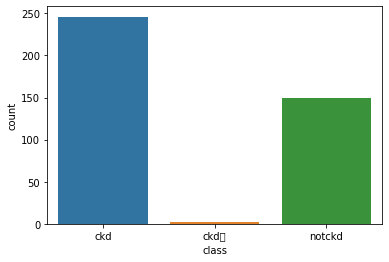

In [26]:
ax = sns.countplot(x="class", data=df) #visualizing class column

In [27]:
#cleaning column class
df["class"] = df["class"].str.replace("\t","")

In [28]:
df["class"].unique() #inspecting changes

array(['ckd', 'notckd'], dtype=object)

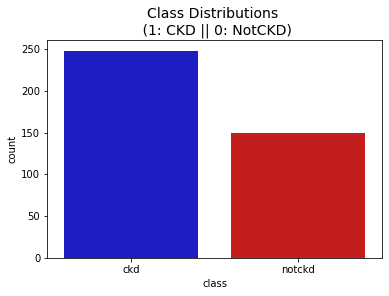

In [29]:
# ax = sns.countplot(x="class", data=df) #distribution of label


colors = ["#0101DF", "#DF0101"]

sns.countplot('class', data=df, palette=colors)
plt.title('Class Distributions \n (1: CKD || 0: NotCKD)', fontsize=14)
plt.show()

In [30]:
# The classes are heavily skewed we need to solve this issue later.
print('Chronic Kidney Disease', round(df['class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Not Chronic Kidney Disease', round(df['class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not Chronic Kidney Disease 62.47 % of the dataset
Chronic Kidney Disease 37.53 % of the dataset


### Mapping categorical attributes to numeric

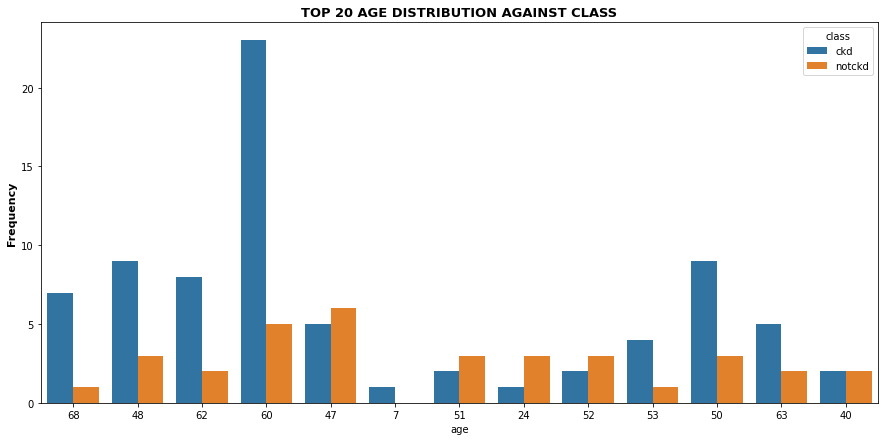

In [31]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(
    "age",
    hue="class",
    data=df,
    order=df["age"][:20].value_counts().index,
    palette="tab10",
)

plt.title(
    "TOP 20 AGE DISTRIBUTION AGAINST CLASS",
    fontsize=13,
    fontweight="bold",
)
plt.ylabel("Frequency", fontsize=11, fontweight="bold")
plt.show()

These attributes below are categorical data:<br>
'red blood cells', 'pus cell', <br>
'pus cell clumps', 'bacteria', <br>
'hypertension', 'diabetes mellitus', 
'coronary artery disease', 'appetite'<br>
'pedal edema', 'anemia'<br>

Task<br>
==== <br>
We will label encode all columns to 0 and 1 respectively using the map function <br>
We will replace 'normal' with 0 and abnormal with 1 <br>
We will replace 'notpresent' with 0 and present with 1 <br>

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["red_blood_cells"] = le.fit_transform(df["red_blood_cells"])
df["pus_cell"] = le.fit_transform(df["pus_cell"])
df["pus_cell_clumps"] = le.fit_transform(df["pus_cell_clumps"])
df["bacteria"] = le.fit_transform(df["bacteria"])
df["hypertension"] = le.fit_transform(df["hypertension"])
df["appetite"] = le.fit_transform(df["appetite"])
df["pedal_edema"] = le.fit_transform(df["pedal_edema"])
df["anemia"] = le.fit_transform(df["anemia"])

df["diabetes_mellitus"] = le.fit_transform(df["diabetes_mellitus"])
df["coronary_artery_disease"] = le.fit_transform(df["coronary_artery_disease"])
df["class"] = le.fit_transform(df["class"])

### Casting Columns to the right Data Types

In [33]:
df["age"] = df["age"].astype(int)
df["blood_pressure"] = df["blood_pressure"].astype(int)
df["sugar"] = df["sugar"].astype(int)
df["specific_gravity"] = df["specific_gravity"].astype(float)
df["albumin"] = df["albumin"].astype(int)

df["red_blood_cells"] = df["red_blood_cells"].astype(int)
df["blood_glucose_random"] = df["blood_glucose_random"].astype(int)
df["blood_urea"] = df["blood_urea"].astype(float)
df["serum_creatinine"] = df["serum_creatinine"].astype(float)
df["sodium"] = df["sodium"].astype(float)

df["potassium"] = df["potassium"].astype(float)
df["hemoglobin"] = df["hemoglobin"].astype(float)
df["packed_cell_volume"] = df["packed_cell_volume"].astype(int)
df["white_blood_cell_count"] = df["white_blood_cell_count"].astype(int)
df["red_blood_cell_count"] = df["red_blood_cell_count"].astype(float)

df["hypertension"] = df["hypertension"].astype(int)
df["diabetes_mellitus"] = df["diabetes_mellitus"].astype(int)
df["coronary_artery_disease"] = df["coronary_artery_disease"].astype(int)
df["appetite"] = df["appetite"].astype(int)
df["pedal_edema"] = df["pedal_edema"].astype(int)
df["anemia"] = df["anemia"].astype(int)

# Feature Selection

## Correlation
In the correlation below, we will be exploring relationships equal to and above 80% <br> excluding relationships against self which shows us nothing as our threshold.

In [34]:
df.corr()

age  blood_pressure  specific_gravity   albumin  \
age                      1.000000        0.134565         -0.164177  0.085645   
blood_pressure           0.134565        1.000000         -0.164341  0.118592   
specific_gravity        -0.164177       -0.164341          1.000000 -0.477966   
albumin                  0.085645        0.118592         -0.477966  1.000000   
sugar                    0.200933        0.191933         -0.285922  0.291086   
red_blood_cells         -0.019972       -0.150755          0.256188 -0.396997   
pus_cell                -0.099858       -0.151079          0.361350 -0.557528   
pus_cell_clumps          0.151914        0.049332         -0.300323  0.411323   
bacteria                 0.041342        0.110404         -0.233383  0.379825   
blood_glucose_random     0.251378        0.152417         -0.283503  0.282707   
blood_urea               0.194700        0.181736         -0.249581  0.349508   
serum_creatinine         0.136359        0.143348         -0.173442  0.162095   
sodium                  -0.090891       -0.106270          0.250619 -0.238948   
potassium                0.047100        0.055295         -0.012985  0.092815   
hemoglobin              -0.167086       -0.255439          0.444110 -0.455345   
packed_cell_volume      -0.213398       -0.285154          0.496502 -0.471522   
white_blood_cell_count   0.113426        0.040281         -0.239895  0.213693   
red_blood_cell_count    -0.199601       -0.208753          0.376782 -0.370119   
hypertension             0.397876        0.263206         -0.321276  0.401396   
diabetes_mellitus        0.374320        0.225495         -0.346539  0.306710   
coronary_artery_disease  0.230760        0.084335         -0.137436  0.202091   
appetite                 0.156506        0.175574         -0.233838  0.305074   
pedal_edema              0.092272        0.050972         -0.248789  0.405328   
anemia                   0.057210        0.195646         -0.186438  0.230966   
class                   -0.239134       -0.292720          0.658802 -0.531811   

                            sugar  red_blood_cells  pus_cell  pus_cell_clumps  \
age                      0.200933        -0.019972 -0.099858         0.151914   
blood_pressure           0.191933        -0.150755 -0.151079         0.049332   
specific_gravity        -0.285922         0.256188  0.361350        -0.300323   
albumin                  0.291086        -0.396997 -0.557528         0.411323   
sugar                    1.000000        -0.100494 -0.186273         0.157755   
red_blood_cells         -0.100494         1.000000  0.380853        -0.106226   
pus_cell                -0.186273         0.380853  1.000000        -0.512868   
pus_cell_clumps          0.157755        -0.106226 -0.512868         1.000000   
bacteria                 0.125780        -0.183869 -0.333117         0.279583   
blood_glucose_random     0.626623        -0.126632 -0.240051         0.199358   
blood_urea               0.139288        -0.233741 -0.348118         0.192742   
serum_creatinine         0.103475        -0.134673 -0.159728         0.056917   
sodium                  -0.059623         0.147584  0.182964        -0.158617   
potassium                0.173536         0.030042 -0.142556        -0.029826   
hemoglobin              -0.155560         0.269827  0.395421        -0.277208   
packed_cell_volume      -0.200288         0.277117  0.419718        -0.302044   
white_blood_cell_count   0.169673        -0.021381 -0.106315         0.157153   
red_blood_cell_count    -0.167574         0.165154  0.369014        -0.243772   
hypertension             0.258930        -0.140922 -0.285825         0.187482   
diabetes_mellitus        0.421187        -0.148417 -0.196911         0.158265   
coronary_artery_disease  0.239298        -0.110747 -0.174231         0.191927   
appetite                 0.078289        -0.159704 -0.278309         0.194882   
pedal_edema              0.110433        -0.201590 -0.342443

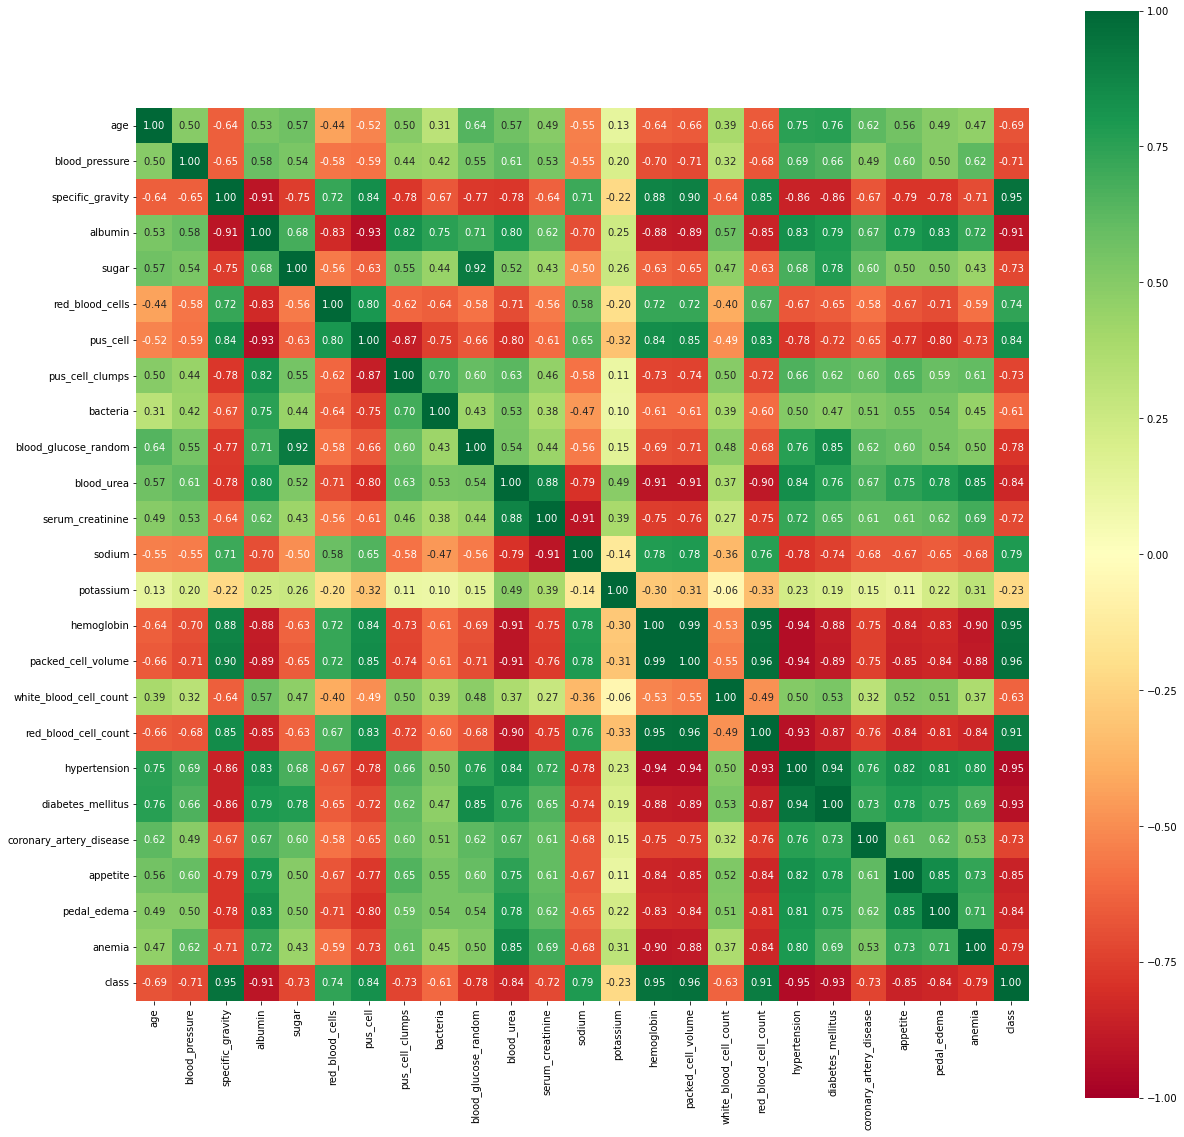

In [35]:
import pandas as pd
from dython.nominal import associations
complete_correlation= associations(df.corr(), filename= 'complete_correlation.png', figsize=(20,20), cmap="RdYlGn")

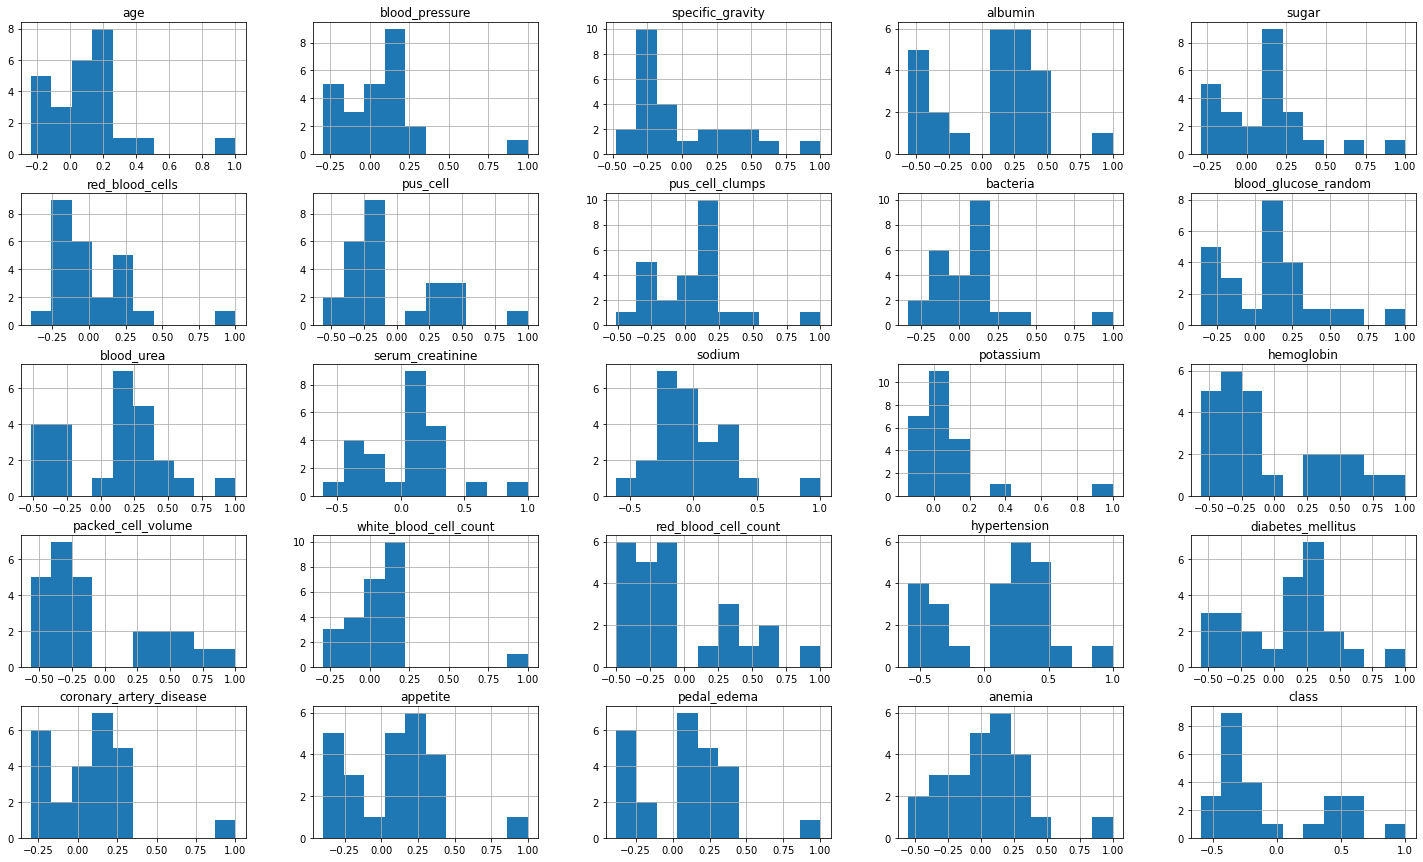

In [36]:
ax = df.corr().hist(figsize = (25, 15))
plt.show()

### Note: Below are some of the limitations of the correlation:
* It show be noted that correlation does not imply causation.  
* Only continuous data is acceptable
* Only derives linear relationship (There surely will be other sparse relaionships)

* Ascombe's Quartet tells exactly why the observing the graph proves the real relationships

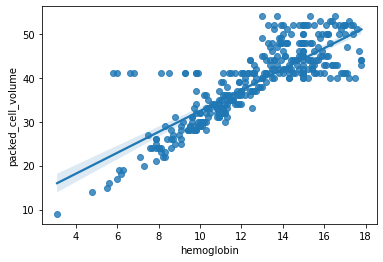

In [49]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["hemoglobin"], y=df["packed_cell_volume"])

plt.savefig("Plotting_Correlation_Scatterplot_With_Regression_Fit.jpg")

In [37]:
#splicing dataframe into independent and dependent variables
X = df.iloc[0:400, 0:24]
y = df.iloc[:, -1]

In [38]:
X.head(2)

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0   48              80              1.02        1      0                1   
1    7              50              1.02        4      0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  hemoglobin  \
0         1                0         0                   121  ...        15.4   
1         1                0         0                    99  ...        11.3   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   5.2   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   

   pedal_edema  anemia  
0            0       0  
1            0       0  

[2 rows x 24 columns]

In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
392    1
393    1
394    1
395    1
396    1
Name: class, Length: 397, dtype: int32

# Hypothesis Testing Addressing Problem statements
[add_constant](https://stackoverflow.com/questions/38836465/how-to-get-the-regression-intercept-using-statsmodels-api) <br>
[statsmodels doc](statsmodels.org/0.9.0/example_formulas.html)



In [40]:
import statsmodels.api as sm
endog = y
exog = sm.add_constant(X)

In [41]:
# X is our 24 independent variables and y is our dependent variable y(class)
# Fit and summarize OLS model
mod = sm.OLS(endog, exog)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     37.18
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           1.10e-83
Time:                        18:09:38   Log-Likelihood:                -32.564
No. Observations:                 397   AIC:                             115.1
Df Residuals:                     372   BIC:                             214.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Scaling for Dimensionality Reduction Process

z = (variable value - mean)/Standard Deviation

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
new_X = sc.fit_transform(X)

In [43]:
new_X

array([[-0.21514774,  0.2537764 ,  0.41742111, ..., -0.51021315,
        -0.48261709, -0.42194969],
       [-2.6319592 , -1.96863308,  0.41742111, ..., -0.51021315,
        -0.48261709, -0.42194969],
       [ 0.61010495,  0.2537764 , -1.4238698 , ...,  1.95996516,
        -0.48261709,  2.36995077],
       ...,
       [-2.3372261 ,  0.2537764 ,  0.41742111, ..., -0.51021315,
        -0.48261709, -0.42194969],
       [-2.04249299, -1.22782992,  1.33806657, ..., -0.51021315,
        -0.48261709, -0.42194969],
       [ 0.37431847,  0.2537764 ,  1.33806657, ..., -0.51021315,
        -0.48261709, -0.42194969]])

## Dimensionality Reduction

### Covariance Matrix Formula
==================================
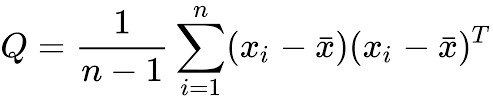

In [44]:
#calculating covariance matrix
mean_vec = np.mean(new_X, axis= 0)
cov_mat = (new_X - mean_vec).T.dot((new_X -  mean_vec))/ (new_X[0]-1)
print('Covariance Matrix \n%s' %cov_mat)

Covariance Matrix 
[[-3.26709244e+02 -7.15904602e+01  1.11878799e+02 -3.68323771e+01
  -5.80756400e+01  1.25151086e+01  7.66236325e+01 -4.50287252e+01
  -1.32125012e+01 -7.77997139e+01 -5.42045909e+01 -4.09998703e+01
   2.97618044e+01 -1.42817023e+01  6.56171275e+02  2.04661790e+02
  -3.27618176e+01  1.28638557e+02  5.07615294e+02  3.78028962e+02
  -7.01442365e+01 -4.11416897e+01 -2.47076571e+01 -1.59726686e+01]
 [-4.39637826e+01 -5.32012119e+02  1.11990732e+02 -5.10017775e+01
  -5.54744012e+01  9.44675542e+01  1.15926269e+02 -1.46225089e+01
  -3.52839975e+01 -4.71718637e+01 -5.05954578e+01 -4.31011243e+01
   3.47975064e+01 -1.67666382e+01  1.00314550e+03  2.73480175e+02
  -1.16348787e+01  1.34536352e+02  3.35800802e+02  2.27729429e+02
  -2.56355084e+01 -4.61542404e+01 -1.36487523e+01 -5.46231238e+01]
 [ 5.36381080e+01  8.74314826e+01 -6.81452779e+02  2.05554432e+02
   8.26398783e+01 -1.60534313e+02 -2.77272144e+02  8.90184235e+01
   7.45870481e+01  8.77419523e+01  6.94836163e+01  5.21

### Perform Eigen Decompostion on Covariance Matrix

In [45]:
cov_mat = np.cov(new_X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('EigenVectors \n%s' %eig_vecs)
print('EigenValues \n%s' %eig_vals)

EigenVectors 
[[-1.33314847e-01 -1.85722656e-01  3.02627269e-01  5.89074363e-02
  -4.82054479e-02  1.08166340e-01 -3.54422301e-01 -9.77073082e-02
   3.19017605e-01  3.38900276e-01  5.03223546e-01  4.44367658e-02
  -1.09401703e-01  1.59624544e-01  2.30894723e-02  4.55656088e-02
   2.43150067e-01 -1.31953679e-01 -3.63006541e-02 -2.19270441e-01
  -1.65210696e-01 -1.19389483e-01  1.55311198e-01  1.42727081e-03]
 [-1.30686116e-01 -1.09667983e-02  1.20852562e-01 -1.51265330e-02
   1.34589950e-01 -4.80395117e-01  2.30869482e-01 -2.41347184e-01
   6.08136255e-01  5.23930803e-02 -1.82036615e-01  3.37537956e-02
   1.35916936e-01 -2.87503372e-01  1.67214047e-02 -2.70898087e-01
   2.82399057e-02 -4.52685459e-02 -1.37600299e-01  2.17813198e-03
   3.93421149e-02 -2.34989149e-02 -7.14790053e-03  4.40321390e-02]
 [ 2.28925208e-01  1.38568840e-01  1.42661319e-01 -3.80209639e-02
   6.19426735e-02  9.73133000e-02 -1.62578532e-01 -2.47037398e-01
   1.25802099e-02  1.77361265e-01 -2.54672163e-01 -3.7865438

### Visually Confirm that list is sorted by decreasing eigen values

* We decided to go with 10 removing the rest with the lowest eigen values can be dropped

In [46]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
print('EigenValues in descending order: ')
for i in eig_pairs:
    print(i[0])

EigenValues in descending order: 
6.862304546762264
1.8893477038199042
1.7582494556658568
1.3187562600884728
1.231302136773395
1.0670417428518186
1.040157350311212
1.0008128163124703
0.8953324352986414
0.810074510502336
0.7890268136773759
0.1592663010876296
0.6957563223879468
0.6458527460029708
0.22067586979617207
0.5819238790779592
0.525035277449821
0.2923597986095071
0.289443002877959
0.4557787584251945
0.43486012081834474
0.34663273482956125
0.35659588362968464
0.3940195935495659


In [47]:
eig_pairs

[(6.862304546762264,
  array([-0.13331485, -0.13068612,  0.22892521, -0.25734633, -0.15470494,
          0.14631496,  0.23200852, -0.16840444, -0.12499788, -0.17334895,
         -0.24815941, -0.17702184,  0.17428573, -0.05711614,  0.30296173,
          0.31547007, -0.09408367,  0.2668217 , -0.27501685, -0.24525174,
         -0.15830855, -0.196358  , -0.195823  , -0.19404296])),
 (1.8893477038199042,
  array([-0.18572266, -0.0109668 ,  0.13856884, -0.11493654, -0.43165221,
         -0.00324486,  0.04520351, -0.15065013, -0.10670861, -0.43742686,
          0.3008127 ,  0.35005111, -0.22653119,  0.11972184, -0.15899221,
         -0.13047441, -0.22042033, -0.12336503, -0.0361607 , -0.21231469,
         -0.08154306,  0.01893265,  0.05903   ,  0.27841669])),
 (1.7582494556658568,
  array([ 0.30262727,  0.12085256,  0.14266132, -0.31655218,  0.19207538,
          0.27004996,  0.36331762, -0.3065846 , -0.35831052,  0.20585432,
          0.07646899,  0.21561052, -0.12137819,  0.11556152,  0.006

The scree plot shows that 8 values are greater than 1

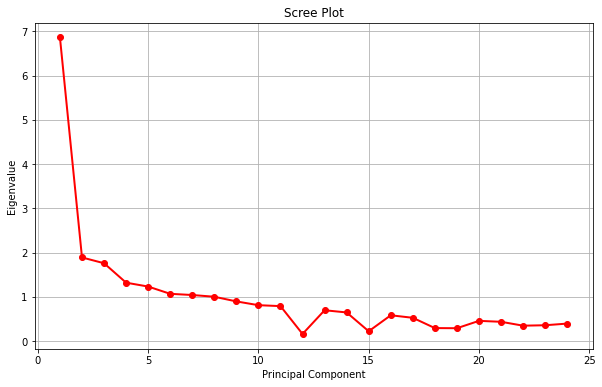

In [48]:
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(eig_vals)) + 1
plt.plot(sing_vals,eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show() 

### Principal Component Analysis
* Reason for PCA is to extract the variables that are highly significant and independent of one another in order to reduce the bias in prediction

* Doing PCA to reduce the complexity of the algorithm

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components = 8)
pca.fit_transform(new_X)

array([[-0.79185121, -0.41856485,  1.01269966, ..., -0.13037759,
        -0.20132931, -0.40576973],
       [-1.45299688,  0.78418662, -1.88633516, ...,  0.10392795,
        -0.52550584,  0.40363931],
       [ 2.74758857, -2.3209181 ,  1.57707996, ..., -1.46460747,
        -1.35061892,  0.7928642 ],
       ...,
       [-2.83565378,  0.56878713, -0.56145371, ..., -0.54233208,
        -0.75549969, -0.18611395],
       [-3.02622023,  0.75423222, -0.42767459, ...,  0.42527988,
        -0.30812815,  0.16123645],
       [-3.09333714, -0.31773026,  0.35703057, ..., -0.09575582,
         0.15919059, -0.71635332]])

### Explained Variance

In [51]:
print(
    "Explained Variation per principle component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained Variation per principle component: [0.28520913 0.07852453 0.07307586 0.05480977 0.05117503 0.04434808
 0.04323072 0.04159549]


# Computing Loadings(weights) to determine variables to be selected

* Source: [PCA LOADINGS](https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html)


* The columns of the dataframe contain the eigenvectors associated with the eight principal components. <br> Each element represents a loading, namely how much (the weight) each original variable contributes to the corresponding principal component.

* The diagram below shows which features on the right have positive correlation to be passed for model selection.

In [52]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=X.columns)
loadings

PC1       PC2       PC3       PC4       PC5  \
age                      0.133315 -0.185723  0.302627 -0.058907  0.048205   
blood_pressure           0.130686 -0.010967  0.120853  0.015127 -0.134590   
specific_gravity        -0.228925  0.138569  0.142661  0.038021 -0.061943   
albumin                  0.257346 -0.114937 -0.316552  0.099513  0.019439   
sugar                    0.154705 -0.431652  0.192075  0.313686 -0.046833   
red_blood_cells         -0.146315 -0.003245  0.270050 -0.116922 -0.121999   
pus_cell                -0.232009  0.045204  0.363318 -0.193346  0.025958   
pus_cell_clumps          0.168404 -0.150650 -0.306585  0.064259  0.141525   
bacteria                 0.124998 -0.106709 -0.358311  0.158193  0.141808   
blood_glucose_random     0.173349 -0.437427  0.205854  0.133130 -0.001002   
blood_urea               0.248159  0.300813  0.076469  0.256072 -0.098559   
serum_creatinine         0.177022  0.350051  0.215611  0.258152  0.341592   
sodium                  -0.174286 -0.226531 -0.121378 -0.005620 -0.591346   
potassium                0.057116  0.119722  0.115562  0.592096 -0.445042   
hemoglobin              -0.302962 -0.158992  0.006864  0.151027  0.112654   
packed_cell_volume      -0.315470 -0.130474  0.000530  0.133164  0.109247   
white_blood_cell_count   0.094084 -0.220420 -0.086344 -0.259681 -0.087770   
red_blood_cell_count    -0.266822 -0.123365 -0.035870  0.089470  0.078973   
hypertension             0.275017 -0.036161  0.237819 -0.176216 -0.036678   
diabetes_mellitus        0.245252 -0.212315  0.297625 -0.113932  0.006145   
coronary_artery_disease  0.158309 -0.081543  0.131784  0.063279  0.290562   
appetite                 0.196358  0.018933 -0.054990 -0.317010 -0.106200   
pedal_edema              0.195823  0.059030 -0.108951 -0.173166 -0.153046   
anemia                   0.194043  0.278417  0.008148 -0.106297 -0.290220   

                              PC6       PC7       PC8  
age                      0.108166  0.354422 -0.097707  
blood_pressure          -0.480395 -0.230869 -0.241347  
specific_gravity         0.097313  0.162579 -0.247037  
albumin                  0.104716 -0.097968  0.004756  
sugar                   -0.032149 -0.174538  0.089039  
red_blood_cells          0.066684  0.452429  0.383768  
pus_cell                 0.000837 -0.088201  0.055729  
pus_cell_clumps         -0.133162  0.447609  0.233254  
bacteria                -0.021689  0.177300 -0.129860  
blood_glucose_random    -0.102957 -0.147608  0.051766  
blood_urea               0.153067  0.029876  0.046523  
serum_creatinine         0.152817 -0.142752  0.197659  
sodium                   0.017949  0.161783 -0.188648  
potassium                0.207525  0.083137  0.071729  
hemoglobin               0.206105 -0.050524 -0.030486  
packed_cell_volume       0.160464 -0.030949 -0.059442  
white_blood_cell_count   0.251277 -0.122965  0.559405  
red_blood_cell_count     0.095177 -0.171347  0.026178  
hypertension             0.019991  0.078242 -0.118535  
diabetes_mellitus        0.068329 -0.086832 -0.059540  
coronary_artery_disease  0.105394  0.374745 -0.349885  
appetite                 0.269398 -0.045480 -0.187951  
pedal_edema              0.547036 -0.165456 -0.195834  
anemia                  -0.290178  0.051537  0.158593

In [53]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()


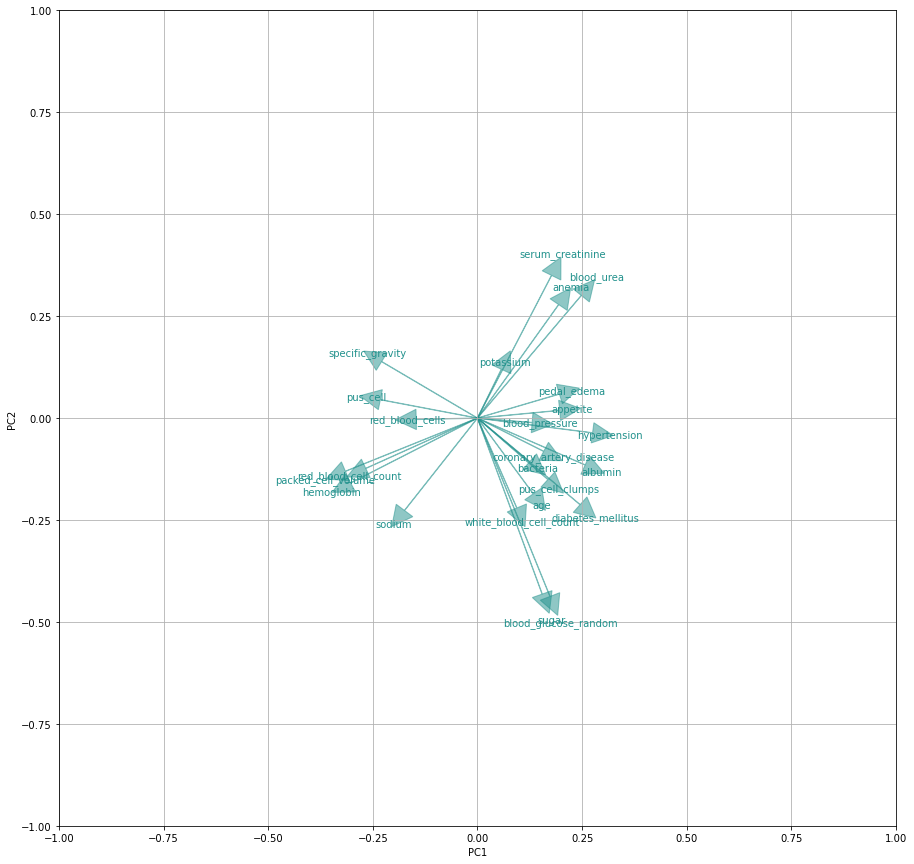

In [54]:
fig, ax = plt.subplots(figsize = (15,15))
loading_plot(pca.components_.T, X.columns)

# Loading Matrix

* Here each entry of the matrix contains the correlation between the original variable and the principal component

The list below shows the variables with the highest correlation with respective principal components
1. hypertension 
2. Serum Cretinine
3. Age
4. Potassium
5. (i) Serum Cretinine (ii) Coronary Artery Disease
6. Pedal Edema
7. Pus Cell Clumps
8. White Blood Cell Count

* Looking at the diagram above we can see that this variables observed in loading matrix compute aligns with the loadings as seen in the diagram

In [55]:
new_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(new_loadings, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=X.columns)
loading_matrix

PC1       PC2       PC3       PC4       PC5  \
age                      0.349232 -0.255282  0.401281 -0.067648  0.053491   
blood_pressure           0.342345 -0.015074  0.160249  0.017371 -0.149346   
specific_gravity        -0.599692  0.190468  0.189167  0.043662 -0.068734   
albumin                  0.674144 -0.157984 -0.419745  0.114277  0.021570   
sugar                    0.405265 -0.593321  0.254690  0.360227 -0.051968   
red_blood_cells         -0.383287 -0.004460  0.358084 -0.134269 -0.135375   
pus_cell                -0.607770  0.062134  0.481756 -0.222033  0.028804   
pus_cell_clumps          0.441152 -0.207074 -0.406528  0.073793  0.157042   
bacteria                 0.327444 -0.146675 -0.475116  0.181664  0.157356   
blood_glucose_random     0.454105 -0.601259  0.272961  0.152883 -0.001112   
blood_urea               0.650078  0.413478  0.101397  0.294066 -0.109365   
serum_creatinine         0.463726  0.481158  0.285897  0.296455  0.379044   
sodium                  -0.456559 -0.311375 -0.160946 -0.006454 -0.656182   
potassium                0.149621  0.164562  0.153233  0.679946 -0.493837   
hemoglobin              -0.793639 -0.218540  0.009102  0.173435  0.125006   
packed_cell_volume      -0.826405 -0.179342  0.000703  0.152921  0.121224   
white_blood_cell_count   0.246462 -0.302976 -0.114492 -0.298210 -0.097393   
red_blood_cell_count    -0.698966 -0.169570 -0.047563  0.102745  0.087631   
hypertension             0.720434 -0.049704  0.315345 -0.202361 -0.040700   
diabetes_mellitus        0.642461 -0.291834  0.394648 -0.130836  0.006818   
coronary_artery_disease  0.414705 -0.112084  0.174744  0.072668  0.322420   
appetite                 0.514379  0.026024 -0.072916 -0.364045 -0.117844   
pedal_edema              0.512978  0.081139 -0.144467 -0.198859 -0.169826   
anemia                   0.508315  0.382694  0.010804 -0.122068 -0.322040   

                              PC6       PC7       PC8  
age                      0.111733  0.361469 -0.097747  
blood_pressure          -0.496237 -0.235459 -0.241445  
specific_gravity         0.100522  0.165811 -0.247138  
albumin                  0.108170 -0.099915  0.004758  
sugar                   -0.033209 -0.178008  0.089075  
red_blood_cells          0.068883  0.461424  0.383924  
pus_cell                 0.000865 -0.089955  0.055751  
pus_cell_clumps         -0.137553  0.456508  0.233349  
bacteria                -0.022405  0.180825 -0.129912  
blood_glucose_random    -0.106353 -0.150542  0.051787  
blood_urea               0.158115  0.030470  0.046542  
serum_creatinine         0.157857 -0.145590  0.197739  
sodium                   0.018541  0.165000 -0.188724  
potassium                0.214368  0.084790  0.071758  
hemoglobin               0.212901 -0.051528 -0.030498  
packed_cell_volume       0.165756 -0.031564 -0.059466  
white_blood_cell_count   0.259564 -0.125410  0.559633  
red_blood_cell_count     0.098315 -0.174753  0.026188  
hypertension             0.020650  0.079798 -0.118583  
diabetes_mellitus        0.070583 -0.088559 -0.059565  
coronary_artery_disease  0.108869  0.382195 -0.350027  
appetite                 0.278281 -0.046384 -0.188027  
pedal_edema              0.565076 -0.168745 -0.195913  
anemia                  -0.299747  0.052562  0.158657

# Factor Analysis

* Rotated Component Matrix (Varimax)
* Determining the features for deployment

In [56]:
from factor_analyzer import FactorAnalyzer

In [57]:
fa = FactorAnalyzer(n_factors = 8, rotation = "varimax")

In [58]:
fa.fit(df)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [59]:
loads = fa.loadings_

In [60]:
# Get eigenValues and EigenVectors

ev, v = fa.get_eigenvalues()

In [61]:
ev

array([7.45106512, 1.89296868, 1.75402929, 1.35338851, 1.22884217,
       1.08143814, 1.06043713, 1.00487997, 0.89322062, 0.81824326,
       0.79424689, 0.70916222, 0.65240654, 0.58292298, 0.53152402,
       0.47996628, 0.43511146, 0.39562085, 0.35873735, 0.34623522,
       0.29245392, 0.29060276, 0.22018768, 0.21356887, 0.15874007])

In [62]:
# Scree plot

xvals = range(1, df.shape[1]+1)

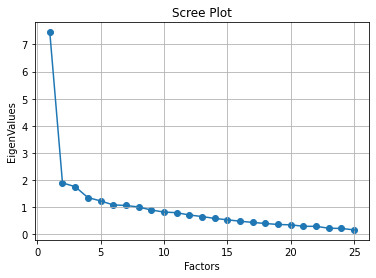

In [63]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("EigenValues")
plt.grid()
plt.show()

In [64]:
pd.DataFrame.from_records(loads, index = df.columns)

0         1         2         3         4  \
age                      0.132566  0.384806 -0.111360  0.080255  0.217829   
blood_pressure           0.275011  0.197227  0.085250  0.058375  0.007339   
specific_gravity        -0.304734 -0.202057 -0.338270 -0.119148 -0.006650   
albumin                  0.225227  0.173763  0.648201  0.067658  0.208462   
sugar                   -0.008411  0.726367  0.193432 -0.012670 -0.106977   
red_blood_cells         -0.153276 -0.052222 -0.523179 -0.092255 -0.057612   
pus_cell                -0.237839 -0.098623 -0.625720 -0.037606 -0.156011   
pus_cell_clumps          0.133473  0.115086  0.313187  0.033478 -0.001368   
bacteria                 0.064233  0.047040  0.402823  0.017947  0.054902   
blood_glucose_random     0.087321  0.719698  0.158500 -0.015077 -0.026348   
blood_urea               0.451909  0.072002  0.183318  0.361637  0.255285   
serum_creatinine         0.194219  0.056729  0.035469  0.875432  0.085264   
sodium                  -0.219621 -0.104068 -0.136350 -0.688803 -0.045007   
potassium                0.084393  0.071653  0.015841  0.001912 -0.008475   
hemoglobin              -0.831706 -0.137290 -0.236011 -0.126785 -0.132913   
packed_cell_volume      -0.788412 -0.169534 -0.240881 -0.149426 -0.165157   
white_blood_cell_count   0.036193  0.103050  0.046229 -0.038271  0.133276   
red_blood_cell_count    -0.570431 -0.185512 -0.180721 -0.151864 -0.220438   
hypertension             0.496361  0.451655  0.038903  0.161944  0.407365   
diabetes_mellitus        0.312386  0.612680  0.019221  0.135597  0.318889   
coronary_artery_disease  0.177870  0.310268  0.125506  0.162188  0.166475   
appetite                 0.264816  0.104347  0.171760  0.061562  0.435856   
pedal_edema              0.178755  0.034590  0.288819  0.055079  0.589044   
anemia                   0.579302 -0.018616  0.077489  0.085485  0.085742   
class                   -0.494075 -0.297674 -0.256643 -0.209936 -0.195723   

                                5         6         7  
age                      0.049090  0.147638  0.011094  
blood_pressure           0.048238 -0.048472  0.031064  
specific_gravity        -0.529382 -0.059429  0.030227  
albumin                  0.273746  0.137047  0.069419  
sugar                    0.175483 -0.010957  0.215962  
red_blood_cells         -0.017438  0.104786  0.036098  
pus_cell                -0.068237 -0.304389 -0.141331  
pus_cell_clumps          0.158196  0.822487 -0.031287  
bacteria                 0.074013  0.178224  0.010174  
blood_glucose_random     0.144115  0.035345  0.018680  
blood_urea              -0.006585  0.076607  0.479280  
serum_creatinine         0.010548 -0.008827  0.294775  
sodium                  -0.054385 -0.043410  0.187221  
potassium               -0.042861 -0.022031  0.623540  
hemoglobin              -0.140932 -0.061174 -0.007650  
packed_cell_volume      -0.212870 -0.078850 -0.046311  
white_blood_cell_count   0.402340  0.082059 -0.019282  
red_blood_cell_count    -0.061291 -0.123115 -0.068659  
hypertension             0.093881  0.054928 -0.041955  
diabetes_mellitus        0.194741 -0.009385 -0.042066  
coronary_artery_disease -0.091739  0.127626 -0.040935  
appetite                 0.155968  0.067609 -0.035755  
pedal_edema              0.174895 -0.060598  0.099818  
anemia                   0.030361  0.073715  0.144751  
class                   -0.570497  0.026006  0.083259

## Splitting data into training and test set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [66]:
X_train.shape

(277, 24)

# Balancing the Dataset

In [67]:
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [68]:
print("After OverSampling, the shape of train_X: {}".format(X_train.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train.shape))

After OverSampling, the shape of train_X: (342, 24)
After OverSampling, the shape of train_y: (342,) 



In [69]:
print("label '1' count after oversampling: {}".format(sum(y_train == 1 )))
print("label '2' count after oversampling: {}".format(sum(y_train == 0)))

label '1' count after oversampling: 171
label '2' count after oversampling: 171


### Visualizing Balanced label

In [70]:
dataset = X_train # balancing the training set
dataset["class"] = y_train

In [71]:
px.histogram(dataset, x="class", color="class") #plot showing balanced dataset

In [72]:
# dropping class from training set
X_train = X_train.drop(['class'], axis= 1)

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

In [74]:
scoring = 'accuracy'
num_trees = 250
max_features = 4
#Spot Check 4 Algorithms (LR, KSVM, RF, XGBoost)
models = []
models.append(('Logistics Regression', LogisticRegression()))
models.append(('KernelSVM', SVC(kernel = 'rbf')))
models.append(('XGB', XGBClassifier(n_estimators=250)))
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfoldCV = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfoldCV, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(results)

Logistics Regression: 0.991176 (0.018833)
[array([1.        , 1.        , 1.        , 0.94117647, 0.97058824,
       1.        , 1.        , 1.        , 1.        , 1.        ])]
KernelSVM: 0.985294 (0.023713)
[array([1.        , 1.        , 1.        , 0.94117647, 0.97058824,
       1.        , 1.        , 1.        , 1.        , 1.        ]), array([1.        , 1.        , 0.97058824, 0.94117647, 0.94117647,
       1.        , 1.        , 1.        , 1.        , 1.        ])]
XGB: 0.976555 (0.025623)
[array([1.        , 1.        , 1.        , 0.94117647, 0.97058824,
       1.        , 1.        , 1.        , 1.        , 1.        ]), array([1.        , 1.        , 0.97058824, 0.94117647, 0.94117647,
       1.        , 1.        , 1.        , 1.        , 1.        ]), array([1.        , 0.97142857, 1.        , 0.97058824, 1.        ,
       0.91176471, 0.97058824, 1.        , 0.97058824, 0.97058824])]
Random Forest Classifier: 1.000000 (0.000000)
[array([1.        , 1.        , 1.   

In [76]:
# make predictions using pca with logistic regression
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

steps = [('norm', MinMaxScaler()), ('pca', PCA(n_components=8)), ('Logistics Regression', LogisticRegression())]
model_lgr = Pipeline(steps=steps)
# fit the model on the whole dataset

model_lgr.fit(X_train, y_train)
# make a single prediction
row = [[40,80,1.025,0,0,1,1,0,0,140,10,1.2,135,5,15,48,10400,4.5,0,0,0,0,0,0]]
yhat = model_lgr.predict(sc.transform(row))
print('Predicted Class from Logistic Regression: %d' % yhat[0])

Predicted Class from Logistic Regression: 1


In [78]:
# make predictions using pca with KSVM
steps = [('norm', MinMaxScaler()), ('pca', PCA(n_components=8)), ('KernelSVM', SVC(kernel = 'rbf'))]
model_ksvm = Pipeline(steps=steps)
# fit the model on the whole dataset
model_ksvm.fit(X_train, y_train)
# make a single prediction
row = [[40,80,1.025,0,0,1,1,0,0,140,10,1.2,135,5,15,48,10400,4.5,0,0,0,0,0,0]]
yhat = model_ksvm.predict(sc.transform(row))
print('Predicted Class from KSVM: %d' % yhat[0])

Predicted Class from KSVM: 1


In [79]:
# make predictions using pca with XGBoost
steps = [('norm', MinMaxScaler()), ('pca', PCA(n_components=8)), ('XGB', XGBClassifier(n_estimators=250))]
model_xgb = Pipeline(steps=steps)
# fit the model on the whole dataset
model_xgb.fit(X_train, y_train)
# make a single prediction
row = [[40,80,1.025,0,0,1,1,0,0,140,10,1.2,135,5,15,48,10400,4.5,0,0,0,0,0,0]]
yhat = model_xgb.predict(sc.transform(row))
print('Predicted Class from XGBoost: %d' % yhat[0])

Predicted Class from XGBoost: 1


In [183]:
# define the model
steps = [('norm', MinMaxScaler()), ('pca', PCA(n_components=8)), ('Random Forest Classifier', RandomForestClassifier(n_estimators=250, max_features=4))]
model_RFF = Pipeline(steps=steps)
# fit the model on the whole dataset
model_RFF = model_RFF.fit(X_train, y_train)
# make a single prediction
row = [[40,80,1.025,0,0,1,1,0,0,140,10,1.2,135,5,15,48,10400,4.5,0,0,0,0,0,0]]
yhat = model_RFF.predict(sc.transform(row))
print('Predicted Class from Random Forest classifier: %d' % yhat[0])

Predicted Class from Random Forest classifier: 1


### Converting Cross Validation list results to dataframe

In [81]:
Cvresult_df = pd.DataFrame(list(map(np.ravel, results))).T

Cvresult_df

0         1         2    3
0  1.000000  1.000000  1.000000  1.0
1  1.000000  1.000000  0.971429  1.0
2  1.000000  0.970588  1.000000  1.0
3  0.941176  0.941176  0.970588  1.0
4  0.970588  0.941176  1.000000  1.0
5  1.000000  1.000000  0.911765  1.0
6  1.000000  1.000000  0.970588  1.0
7  1.000000  1.000000  1.000000  1.0
8  1.000000  1.000000  0.970588  1.0
9  1.000000  1.000000  0.970588  1.0

In [82]:
# assigning column names
Cvresult_df.columns = ['Logistics_Regression', 'Kernel_SVM', 'XGBoost', 'Random_Forest']

In [83]:
Cvresult_df

Logistics_Regression  Kernel_SVM   XGBoost  Random_Forest
0              1.000000    1.000000  1.000000            1.0
1              1.000000    1.000000  0.971429            1.0
2              1.000000    0.970588  1.000000            1.0
3              0.941176    0.941176  0.970588            1.0
4              0.970588    0.941176  1.000000            1.0
5              1.000000    1.000000  0.911765            1.0
6              1.000000    1.000000  0.970588            1.0
7              1.000000    1.000000  1.000000            1.0
8              1.000000    1.000000  0.970588            1.0
9              1.000000    1.000000  0.970588            1.0

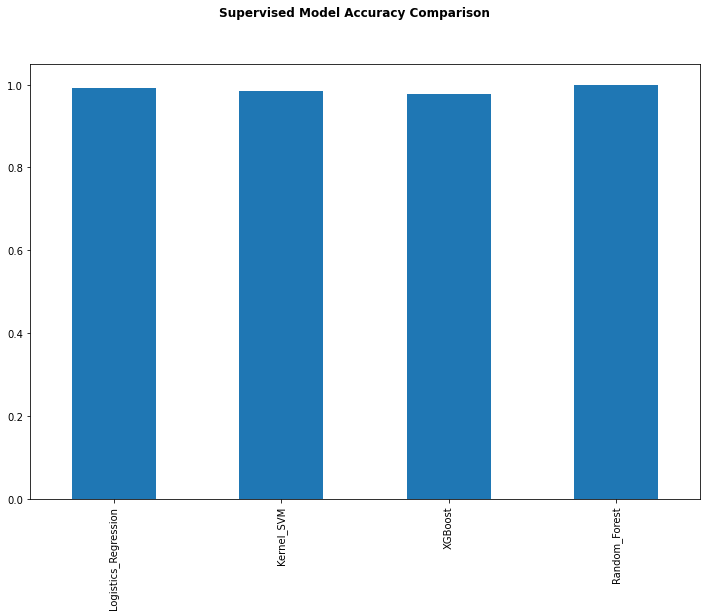

In [84]:
# plot model performance for comparison
fig = plt.figure(figsize=(12,8))
fig.suptitle('Supervised Model Accuracy Comparison', fontweight="bold")
Cvresult_df.mean().plot(kind="bar")
plt.show()

# Statistical Testing on Supervised Learning Result

In [87]:
Cvresult_df.head()

Logistics_Regression  Kernel_SVM   XGBoost  Random_Forest
0              1.000000    1.000000  1.000000            1.0
1              1.000000    1.000000  0.971429            1.0
2              1.000000    0.970588  1.000000            1.0
3              0.941176    0.941176  0.970588            1.0
4              0.970588    0.941176  1.000000            1.0

### Running the Repeated Measures Anova on Supervised Learning results

Note: Anova is called omnibus test. It test for the overall difference between groups

In [88]:
from scipy import stats
import pingouin as pg

In [89]:
# applying repeated measure anova on the overall table
pg.rm_anova(Cvresult_df.iloc[0:, 0:4])

Source  ddof1  ddof2         F     p-unc       np2       eps
0  Within      3     27  2.416018  0.088287  0.211634  0.484425

#### Report: Test fail to reject null hypothesis H0. p-value shows that there is no significant difference is accuracy.
* Level of Significance and P-Values
* To say that a result is statistically significant at the level alpha just means that the p-value is less than alpha. 
* if the p-value is less than 0.05, then we reject the null hypothesis
* There is need for post hoc test as result is statistically significant report

#### Experiment with pairwise ttests to determine which model accuracy values are high to impact pvalue
REPORT:
* Test fail to reject H0 as the pvalue is greater than alpha, revealing that there is no statistical significance between the accuracy as presented.

# Post Hoc Test

* Post Hoc follow up Test to determine what the diferences are
<br>
* Post Hoc is necessary when you reject the null and there are three  or more groups

#### Conducting 6 family wise tests to compare pvalue with a correction test (Bonferroni Correction)

In [90]:
test_1 = stats.ttest_ind(Cvresult_df["Logistics_Regression"], Cvresult_df["Kernel_SVM"])
test_2 = stats.ttest_ind(Cvresult_df["Logistics_Regression"], Cvresult_df["XGBoost"])
test_3 = stats.ttest_ind(Cvresult_df["Logistics_Regression"], Cvresult_df["Random_Forest"])
test_4 = stats.ttest_ind(Cvresult_df["Kernel_SVM"], Cvresult_df["XGBoost"])
test_5 = stats.ttest_ind(Cvresult_df["Kernel_SVM"], Cvresult_df["Random_Forest"])
test_6 = stats.ttest_ind(Cvresult_df["XGBoost"], Cvresult_df["Random_Forest"])

print('Logistics_Regression', 'Kernel_SVM: ', test_1)
print('Logistics_Regression', 'XGBoost: ', test_2)
print('Logistics_Regression', 'Random_Forest: ', test_3)
print('Kernel_SVM', 'XGBoost: ', test_4)
print('Kernel_SVM', 'Random_Forest: ', test_5)
print('XGBoost', 'Random_Forest: ', test_6)

Logistics_Regression Kernel_SVM:  Ttest_indResult(statistic=0.5827715174143564, pvalue=0.5672768905605596)
Logistics_Regression XGBoost:  Ttest_indResult(statistic=1.379456762474782, pvalue=0.1846523362782072)
Logistics_Regression Random_Forest:  Ttest_indResult(statistic=-1.4055638569974491, pvalue=0.1768796480794021)
Kernel_SVM XGBoost:  Ttest_indResult(statistic=0.7510031299808704, pvalue=0.46235686953014077)
Kernel_SVM Random_Forest:  Ttest_indResult(statistic=-1.86052101883812, pvalue=0.07922998223566365)
XGBoost Random_Forest:  Ttest_indResult(statistic=-2.745088675667703, pvalue=0.013311064085430776)


Report: The test above shows that there is one pair that shows a pvalue of 0.01, a value less than the alpha shiwch means that result is statistically significant and will require a post hoc test

In [91]:
pv = [test_1[1], test_2[1], test_3[1], test_4[1], test_5[1], test_6[1]]
pv

[0.5672768905605596,
 0.1846523362782072,
 0.1768796480794021,
 0.46235686953014077,
 0.07922998223566365,
 0.013311064085430776]

In [92]:
# By doing 6 tests, there is 26.5% of discovering one of more false postive result
FWER = 1 - (1 - 0.05)**6
FWER

0.2649081093750002

# Bonferroni Test

In [93]:
Bonferrini_corrected_alpha = 0.05/6
print('The new alpha is: ', Bonferrini_corrected_alpha)

The new alpha is:  0.008333333333333333


In [94]:
# 4.7% is the new alpha
new_FWER = 1 - (1 - Bonferrini_corrected_alpha)**6
new_FWER

0.04896983531023591

In [95]:
#checking the new alpha(0.008 against) the pvalues
SL_data = pd.DataFrame(pv, columns=['p-value'])

In [96]:
for i in (SL_data.values):
    if i <= Bonferrini_corrected_alpha:
            print("Test rejects H0 and accepts H1", i)
            
    else:
        print("Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.008")

Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.008
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.008
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.008
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.008
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.008
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.008


Report: The Bonferroni Correction test confirms the ttest report that there is no significant difference in accuracy

# Evaluation Metrics
### Test Accuracies

In [97]:
# supervised learning algorithms assigned to respective objects
log_reg = LogisticRegression()
ksvm = SVC(kernel = 'rbf')
XGB = XGBClassifier(n_estimators=250)
RFF = RandomForestClassifier(n_estimators=250, max_features=4)

In [98]:
# model training, test prediction, accuracies, confusion matrix, classification reports

# Logistics Regression
log_reg.fit(X_train, y_train)
prediction_log_reg = log_reg.predict(X_test)
print("Logistics Regression Accuracy: %s%%" % (100 * accuracy_score(y_test, prediction_log_reg)))
print(confusion_matrix(y_test, prediction_log_reg))
print(classification_report(y_test, prediction_log_reg))

# Kernel SVM
ksvm.fit(X_train, y_train)
prediction_ksvm = ksvm.predict(X_test)
print("Kernel SVM Accuracy: %s%%" % (100 * accuracy_score(y_test, prediction_ksvm)))
print(confusion_matrix(y_test, prediction_ksvm))
print(classification_report(y_test, prediction_ksvm))


# XGBOOST
XGB.fit(X_train, y_train)
prediction_XGB = XGB.predict(X_test)
print("XGBOOST Accuracy: %s%%" % (100 * accuracy_score(y_test, prediction_XGB)))
print(confusion_matrix(y_test, prediction_XGB))
print(classification_report(y_test, prediction_XGB))


# Random forest
RFF.fit(X_train, y_train)
prediction_RF = RFF.predict(X_test)
print("Random Forest Accuracy: %s%%" % (100 * accuracy_score(y_test, prediction_RF)))
print(confusion_matrix(y_test, prediction_RF))
print(classification_report(y_test, prediction_RF))

Logistics Regression Accuracy: 99.16666666666667%
[[76  1]
 [ 0 43]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.98      1.00      0.99        43

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Kernel SVM Accuracy: 98.33333333333333%
[[75  2]
 [ 0 43]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.96      1.00      0.98        43

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

XGBOOST Accuracy: 99.16666666666667%
[[77  0]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.98      0.99        43

# ROC AUC SCORE

In [99]:
# Cross validation prediction for roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.


log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=10,
                             method="decision_function")

svc_pred = cross_val_predict(ksvm, X_train, y_train, cv=10,
                             method="decision_function")

XGB_pred = cross_val_predict(XGB, X_train, y_train, cv=10)

tree_pred = cross_val_predict(RFF, X_train, y_train, cv=10)


In [100]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('Kernel SVM: ', roc_auc_score(y_train, svc_pred))
print('XGBOOST Classifier: ', roc_auc_score(y_train, XGB_pred))
print('RANDOM FOREST Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9998632057727164
Kernel SVM:  0.9984952634998803
XGBOOST Classifier:  0.9853801169590642
RANDOM FOREST Classifier:  1.0


# ROC CURVE

## Model Evaluation

* ROC AUC Curve Model With Highest Accuracy(Kernel Support Vector Machines)
* The decision to use roc curve  was because it is evalutes better when there are roughly equal numbers of observations for each class.
* ROC graphs are based upon TP rate and FP rate, in which each dimension is a strict columnar ratio, so do not depend on class distributions
* It is also a common way to compare models that predict probabilities for two-class problems us to use a
ROC curve.

* [ROC CURVE](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

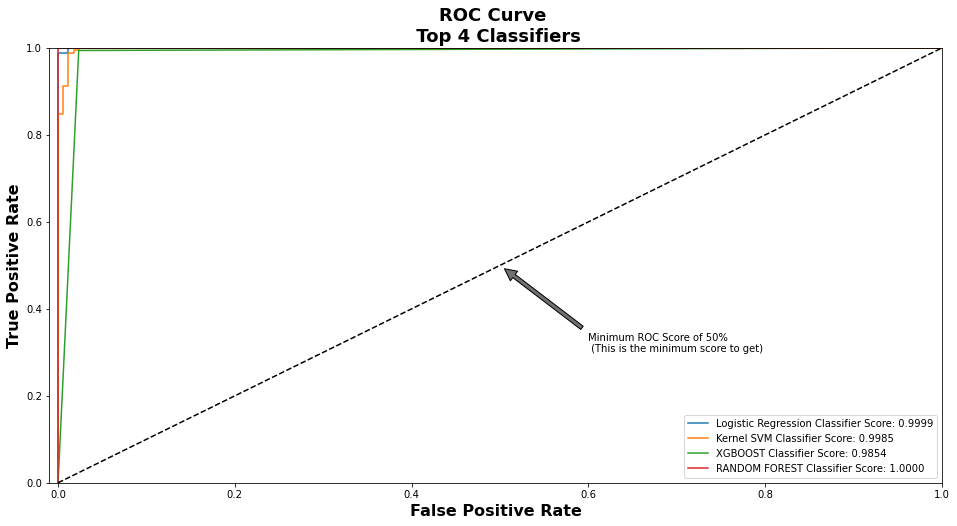

In [101]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
ksvm_fpr, ksvm_tpr, ksvm_threshold = roc_curve(y_train, svc_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_train, XGB_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, ksvm_fpr, ksvm_tpr, xgb_fpr, xgb_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18, fontweight="bold")
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(ksvm_fpr, ksvm_tpr, label='Kernel SVM Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBOOST Classifier Score: {:.4f}'.format(roc_auc_score(y_train, XGB_pred)))
    plt.plot(tree_fpr, tree_tpr, label='RANDOM FOREST Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16, fontweight="bold")
    plt.ylabel('True Positive Rate', fontsize=16, fontweight="bold")
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, ksvm_fpr, ksvm_tpr, xgb_fpr, xgb_tpr, tree_fpr, tree_tpr)
plt.show()

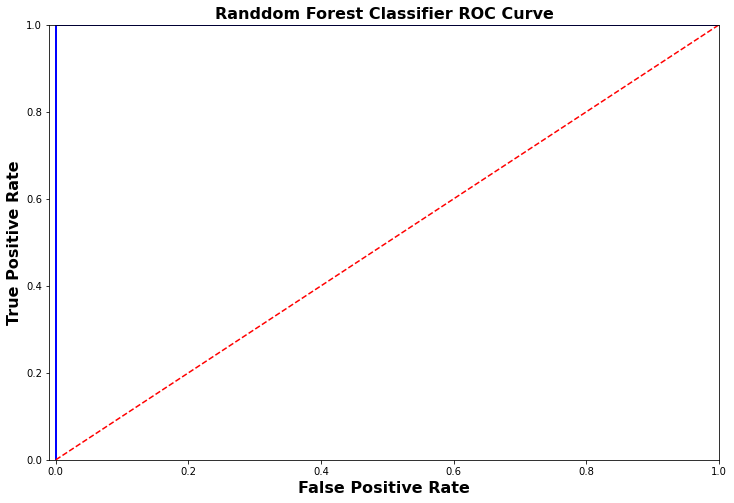

In [102]:
def RFF_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Randdom Forest Classifier ROC Curve', fontsize=16, fontweight="bold")
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16, fontweight="bold")
    plt.ylabel('True Positive Rate', fontsize=16, fontweight="bold")
    plt.axis([-0.01,1,0,1])
    
    
RFF_roc_curve(tree_fpr, tree_tpr)
plt.show()

# Precision Recall Curve



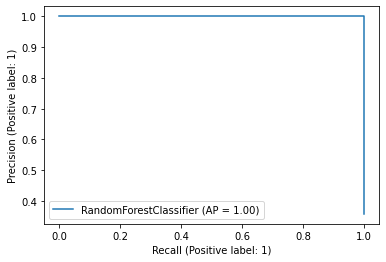

In [103]:
from sklearn.metrics import PrecisionRecallDisplay

disp_confusion = PrecisionRecallDisplay.from_estimator(RFF,
                                                       X_test,
                                                       y_test) 

# Artificial Neural Network Architecture

### MODEL 1

### Initializing the Neural Network

* Activation function: relu, relu, sigmoid(Output layer)
* Dense Units: 12, 8, 1
* Epoch: 150
* Batch Size = 32
* Optimizer: Adam
* wrapper: KerasClassifier
* loss function: binary_crossentropy

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy


# create model
model_1 = Sequential()
model_1.add(Dense(12, input_dim=24, activation='relu'))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
# Compile model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fix random seed for reproducibility
seed = 7

# create model
keras_classifier = KerasClassifier(model_1, epochs=150, batch_size=32)

keras_classifier = keras_classifier.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.3, shuffle=True, verbose=2)


# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
response = cross_val_score(keras_classifier, X_train, y_train, cv=kfold)
print(response.mean())
print(response)

Epoch 1/150
8/8 - 1s - loss: 0.4781 - accuracy: 0.6192 - val_loss: 0.7208 - val_accuracy: 0.2524 - 701ms/epoch - 88ms/step
Epoch 2/150
8/8 - 0s - loss: 0.4439 - accuracy: 0.6653 - val_loss: 0.6654 - val_accuracy: 0.4272 - 38ms/epoch - 5ms/step
Epoch 3/150
8/8 - 0s - loss: 0.4127 - accuracy: 0.7448 - val_loss: 0.6215 - val_accuracy: 0.6505 - 45ms/epoch - 6ms/step
Epoch 4/150
8/8 - 0s - loss: 0.3861 - accuracy: 0.8577 - val_loss: 0.5841 - val_accuracy: 0.7573 - 48ms/epoch - 6ms/step
Epoch 5/150
8/8 - 0s - loss: 0.3626 - accuracy: 0.8912 - val_loss: 0.5513 - val_accuracy: 0.8738 - 44ms/epoch - 5ms/step
Epoch 6/150
8/8 - 0s - loss: 0.3415 - accuracy: 0.9331 - val_loss: 0.5207 - val_accuracy: 0.9126 - 45ms/epoch - 6ms/step
Epoch 7/150
8/8 - 0s - loss: 0.3214 - accuracy: 0.9498 - val_loss: 0.4932 - val_accuracy: 0.9417 - 38ms/epoch - 5ms/step
Epoch 8/150
8/8 - 0s - loss: 0.3033 - accuracy: 0.9582 - val_loss: 0.4677 - val_accuracy: 0.9515 - 44ms/epoch - 5ms/step
Epoch 9/150
8/8 - 0s - loss: 0

Epoch 69/150
8/8 - 0s - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9903 - 48ms/epoch - 6ms/step
Epoch 70/150
8/8 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9903 - 44ms/epoch - 5ms/step
Epoch 71/150
8/8 - 0s - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9903 - 47ms/epoch - 6ms/step
Epoch 72/150
8/8 - 0s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9903 - 42ms/epoch - 5ms/step
Epoch 73/150
8/8 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9903 - 46ms/epoch - 6ms/step
Epoch 74/150
8/8 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 0.9903 - 40ms/epoch - 5ms/step
Epoch 75/150
8/8 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9903 - 41ms/epoch - 5ms/step
Epoch 76/150
8/8 - 0s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9903 - 42ms/epoch - 5ms/step
Epoch 77/150
8/8 - 0s - 

Epoch 136/150
8/8 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9903 - 45ms/epoch - 6ms/step
Epoch 137/150
8/8 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9903 - 48ms/epoch - 6ms/step
Epoch 138/150
8/8 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9903 - 47ms/epoch - 6ms/step
Epoch 139/150
8/8 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9903 - 45ms/epoch - 6ms/step
Epoch 140/150
8/8 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9903 - 47ms/epoch - 6ms/step
Epoch 141/150
8/8 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9903 - 45ms/epoch - 6ms/step
Epoch 142/150
8/8 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9903 - 41ms/epoch - 5ms/step
Epoch 143/150
8/8 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9903 - 43ms/epoch - 5ms/step
Epoch 144/150
8/

10/10 [==============================] - 0s 2ms/step - loss: 2.8180e-04 - accuracy: 1.0000
Epoch 142/150
10/10 [==============================] - 0s 2ms/step - loss: 2.7874e-04 - accuracy: 1.0000
Epoch 143/150
10/10 [==============================] - 0s 2ms/step - loss: 2.7582e-04 - accuracy: 1.0000
Epoch 144/150
10/10 [==============================] - 0s 2ms/step - loss: 2.7272e-04 - accuracy: 1.0000
Epoch 145/150
10/10 [==============================] - 0s 2ms/step - loss: 2.7035e-04 - accuracy: 1.0000
Epoch 146/150
10/10 [==============================] - 0s 2ms/step - loss: 2.6665e-04 - accuracy: 1.0000
Epoch 147/150
10/10 [==============================] - 0s 2ms/step - loss: 2.6439e-04 - accuracy: 1.0000
Epoch 148/150
10/10 [==============================] - 0s 2ms/step - loss: 2.6123e-04 - accuracy: 1.0000
Epoch 149/150
10/10 [==============================] - 0s 2ms/step - loss: 2.5815e-04 - accuracy: 1.0000
Epoch 150/150
2/2 [==============================] - 0s 3ms/step
INFO

10/10 [==============================] - 0s 2ms/step - loss: 5.3219e-04 - accuracy: 1.0000
Epoch 71/150
10/10 [==============================] - 0s 2ms/step - loss: 5.2449e-04 - accuracy: 1.0000
Epoch 72/150
10/10 [==============================] - 0s 2ms/step - loss: 5.1504e-04 - accuracy: 1.0000
Epoch 73/150
10/10 [==============================] - 0s 2ms/step - loss: 5.0717e-04 - accuracy: 1.0000
Epoch 74/150
10/10 [==============================] - 0s 2ms/step - loss: 4.9908e-04 - accuracy: 1.0000
Epoch 75/150
10/10 [==============================] - 0s 2ms/step - loss: 4.9078e-04 - accuracy: 1.0000
Epoch 76/150
10/10 [==============================] - 0s 2ms/step - loss: 4.8333e-04 - accuracy: 1.0000
Epoch 77/150
10/10 [==============================] - 0s 2ms/step - loss: 4.7536e-04 - accuracy: 1.0000
Epoch 78/150
10/10 [==============================] - 0s 2ms/step - loss: 4.6849e-04 - accuracy: 1.0000
Epoch 79/150
10/10 [==============================] - 0s 2ms/step - loss: 4.6

10/10 [==============================] - 0s 2ms/step - loss: 6.3510e-04 - accuracy: 1.0000
Epoch 78/150
10/10 [==============================] - 0s 2ms/step - loss: 6.2613e-04 - accuracy: 1.0000
Epoch 79/150
10/10 [==============================] - 0s 2ms/step - loss: 6.1724e-04 - accuracy: 1.0000
Epoch 80/150
10/10 [==============================] - 0s 2ms/step - loss: 6.0586e-04 - accuracy: 1.0000
Epoch 81/150
10/10 [==============================] - 0s 2ms/step - loss: 5.9729e-04 - accuracy: 1.0000
Epoch 82/150
10/10 [==============================] - 0s 2ms/step - loss: 5.8951e-04 - accuracy: 1.0000
Epoch 83/150
10/10 [==============================] - 0s 2ms/step - loss: 5.7945e-04 - accuracy: 1.0000
Epoch 84/150
10/10 [==============================] - 0s 2ms/step - loss: 5.7243e-04 - accuracy: 1.0000
Epoch 85/150
10/10 [==============================] - 0s 2ms/step - loss: 5.6297e-04 - accuracy: 1.0000
Epoch 86/150
10/10 [==============================] - 0s 2ms/step - loss: 5.5

10/10 [==============================] - 0s 2ms/step - loss: 5.4745e-04 - accuracy: 1.0000
Epoch 85/150
10/10 [==============================] - 0s 2ms/step - loss: 5.4097e-04 - accuracy: 1.0000
Epoch 86/150
10/10 [==============================] - 0s 2ms/step - loss: 5.3309e-04 - accuracy: 1.0000
Epoch 87/150
10/10 [==============================] - 0s 2ms/step - loss: 5.2491e-04 - accuracy: 1.0000
Epoch 88/150
10/10 [==============================] - 0s 2ms/step - loss: 5.1856e-04 - accuracy: 1.0000
Epoch 89/150
10/10 [==============================] - 0s 2ms/step - loss: 5.1226e-04 - accuracy: 1.0000
Epoch 90/150
10/10 [==============================] - 0s 2ms/step - loss: 5.0533e-04 - accuracy: 1.0000
Epoch 91/150
10/10 [==============================] - 0s 2ms/step - loss: 4.9625e-04 - accuracy: 1.0000
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 4.8901e-04 - accuracy: 1.0000
Epoch 93/150
10/10 [==============================] - 0s 2ms/step - loss: 4.8

10/10 [==============================] - 0s 2ms/step - loss: 5.1225e-04 - accuracy: 1.0000
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 5.0496e-04 - accuracy: 1.0000
Epoch 93/150
10/10 [==============================] - 0s 2ms/step - loss: 4.9707e-04 - accuracy: 1.0000
Epoch 94/150
10/10 [==============================] - 0s 2ms/step - loss: 4.9277e-04 - accuracy: 1.0000
Epoch 95/150
10/10 [==============================] - 0s 2ms/step - loss: 4.8499e-04 - accuracy: 1.0000
Epoch 96/150
10/10 [==============================] - 0s 2ms/step - loss: 4.7692e-04 - accuracy: 1.0000
Epoch 97/150
10/10 [==============================] - 0s 2ms/step - loss: 4.7096e-04 - accuracy: 1.0000
Epoch 98/150
10/10 [==============================] - 0s 2ms/step - loss: 4.6421e-04 - accuracy: 1.0000
Epoch 99/150
10/10 [==============================] - 0s 2ms/step - loss: 4.6041e-04 - accuracy: 1.0000
Epoch 100/150
10/10 [==============================] - 0s 2ms/step - loss: 4.

10/10 [==============================] - 0s 2ms/step - loss: 4.3371e-04 - accuracy: 1.0000
Epoch 91/150
10/10 [==============================] - 0s 2ms/step - loss: 4.2844e-04 - accuracy: 1.0000
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 4.2208e-04 - accuracy: 1.0000
Epoch 93/150
10/10 [==============================] - 0s 2ms/step - loss: 4.1731e-04 - accuracy: 1.0000
Epoch 94/150
10/10 [==============================] - 0s 2ms/step - loss: 4.1178e-04 - accuracy: 1.0000
Epoch 95/150
10/10 [==============================] - 0s 2ms/step - loss: 4.0779e-04 - accuracy: 1.0000
Epoch 96/150
10/10 [==============================] - 0s 2ms/step - loss: 4.0113e-04 - accuracy: 1.0000
Epoch 97/150
10/10 [==============================] - 0s 2ms/step - loss: 3.9617e-04 - accuracy: 1.0000
Epoch 98/150
10/10 [==============================] - 0s 2ms/step - loss: 3.9175e-04 - accuracy: 1.0000
Epoch 99/150
10/10 [==============================] - 0s 2ms/step - loss: 3.8

10/10 [==============================] - 0s 2ms/step - loss: 5.1668e-04 - accuracy: 1.0000
Epoch 91/150
10/10 [==============================] - 0s 2ms/step - loss: 5.1038e-04 - accuracy: 1.0000
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 5.0260e-04 - accuracy: 1.0000
Epoch 93/150
10/10 [==============================] - 0s 2ms/step - loss: 4.9488e-04 - accuracy: 1.0000
Epoch 94/150
10/10 [==============================] - 0s 2ms/step - loss: 4.8769e-04 - accuracy: 1.0000
Epoch 95/150
10/10 [==============================] - 0s 2ms/step - loss: 4.8158e-04 - accuracy: 1.0000
Epoch 96/150
10/10 [==============================] - 0s 2ms/step - loss: 4.7477e-04 - accuracy: 1.0000
Epoch 97/150
10/10 [==============================] - 0s 2ms/step - loss: 4.6892e-04 - accuracy: 1.0000
Epoch 98/150
10/10 [==============================] - 0s 2ms/step - loss: 4.6163e-04 - accuracy: 1.0000
Epoch 99/150
10/10 [==============================] - 0s 2ms/step - loss: 4.5

10/10 [==============================] - 0s 2ms/step - loss: 4.7454e-04 - accuracy: 1.0000
Epoch 98/150
10/10 [==============================] - 0s 2ms/step - loss: 4.6819e-04 - accuracy: 1.0000
Epoch 99/150
10/10 [==============================] - 0s 2ms/step - loss: 4.6202e-04 - accuracy: 1.0000
Epoch 100/150
10/10 [==============================] - 0s 2ms/step - loss: 4.5594e-04 - accuracy: 1.0000
Epoch 101/150
10/10 [==============================] - 0s 2ms/step - loss: 4.4905e-04 - accuracy: 1.0000
Epoch 102/150
10/10 [==============================] - 0s 2ms/step - loss: 4.4343e-04 - accuracy: 1.0000
Epoch 103/150
10/10 [==============================] - 0s 2ms/step - loss: 4.3783e-04 - accuracy: 1.0000
Epoch 104/150
10/10 [==============================] - 0s 2ms/step - loss: 4.3213e-04 - accuracy: 1.0000
Epoch 105/150
10/10 [==============================] - 0s 2ms/step - loss: 4.2647e-04 - accuracy: 1.0000
Epoch 106/150
10/10 [==============================] - 0s 2ms/step - lo

10/10 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 26/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 27/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 28/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 29/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 30/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 31/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 32/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 33/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 34/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 35/150


10/10 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 33/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 34/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 35/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 36/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 37/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 38/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 39/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 40/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 41/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 42/150


In [105]:
model_1_proba = keras_classifier.predict_proba(X_test)
model_1_proba

4/4 [==============================] - 0s 2ms/step


array([[9.9669516e-01, 3.3048391e-03],
       [1.0000000e+00, 6.3156826e-09],
       [1.0000000e+00, 2.9663460e-13],
       [9.9999994e-01, 3.7168249e-08],
       [9.9999940e-01, 6.1126781e-07],
       [9.9995726e-01, 4.2757700e-05],
       [2.6363134e-04, 9.9973637e-01],
       [9.9995333e-01, 4.6675108e-05],
       [9.9999958e-01, 4.4173234e-07],
       [1.2744069e-03, 9.9872559e-01],
       [1.2055635e-03, 9.9879444e-01],
       [7.8451633e-04, 9.9921548e-01],
       [1.5858102e-01, 8.4141898e-01],
       [9.9999923e-01, 7.9325503e-07],
       [3.0148029e-04, 9.9969852e-01],
       [9.9999946e-01, 5.4884538e-07],
       [9.9997759e-01, 2.2440585e-05],
       [9.1454983e-03, 9.9085450e-01],
       [9.9999523e-01, 4.7825811e-06],
       [4.0718317e-03, 9.9592817e-01],
       [1.0000000e+00, 1.5263453e-08],
       [3.9352179e-03, 9.9606478e-01],
       [2.7358532e-04, 9.9972641e-01],
       [1.0000000e+00, 1.1147933e-08],
       [5.8972836e-04, 9.9941027e-01],
       [2.4708509e-03, 9.

In [106]:
model_1_pred = keras_classifier.predict(X_test)
model_1_pred

4/4 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [107]:
#classification report for ANN model 1
print(classification_report(y_test, model_1_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.98      1.00      0.99        43

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



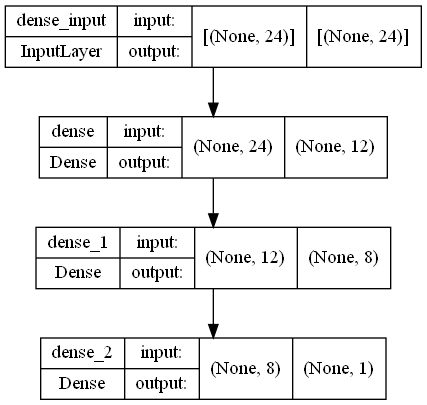

In [108]:
from tensorflow.keras.utils import plot_model
import graphviz
import pydot


#visualize model 1
plot_model(model_1, to_file= 'model_1.png', show_shapes = True)

In [109]:
%load_ext tensorboard

In [110]:
# create folder

log_folder = 'logs'

In [111]:
#callbacks
from tensorflow.keras.callbacks import TensorBoard

In [112]:
# specify callbacks

callbacks = TensorBoard(log_dir=log_folder, histogram_freq=1)

In [113]:
#connect callbacks to model

model_1.fit(X_train, y_train, batch_size=32, verbose=0, callbacks=callbacks)

In [114]:
#visualize

%tensorboard --logdir=(log_folder)

Reusing TensorBoard on port 6006 (pid 10768), started 23 days, 3:50:24 ago. (Use '!kill 10768' to kill it.)

# Model 2

In [115]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy


# create model
model_2 = Sequential()
model_2.add(Dense(12, input_dim=24, activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(8, activation='tanh'))
model_2.add(Dense(8, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))
# Compile model
model_2.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['accuracy'])


# fix random seed for reproducibility
seed = 7

# create model
keras_classifier_2 = KerasClassifier(model_2, epochs=100, batch_size=32)

keras_classifier_2 = keras_classifier_2.fit(X_train, y_train)

# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
response_2 = cross_val_score(keras_classifier_2, X_train, y_train, cv=kfold)
#print(response_2.mean())

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.6566 - accuracy: 0.6959
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.8772
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.9152
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.9357
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.9503
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.9532
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.9620
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9678
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9795
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9854
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 2.3590e-07 - accuracy: 1.0000
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 2.2336e-07 - accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 2.1155e-07 - accuracy: 1.0000
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 2.0113e-07 - accuracy: 1.0000
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 1.9129e-07 - accuracy: 1.0000
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 1.8187e-07 - accuracy: 1.0000
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 1.7293e-07 - accuracy: 1.0000
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 1.6459e-07 - accuracy: 1.0000
Epoch 67/100
10/10 [==============================] - 0s 1ms/step - loss: 1.5665e-07 - accuracy: 1.0000
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4

10/10 [==============================] - 0s 2ms/step - loss: 5.0702e-06 - accuracy: 1.0000
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 4.7128e-06 - accuracy: 1.0000
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 4.3809e-06 - accuracy: 1.0000
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 4.0728e-06 - accuracy: 1.0000
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 3.7868e-06 - accuracy: 1.0000
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 3.5214e-06 - accuracy: 1.0000
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 3.2749e-06 - accuracy: 1.0000
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 3.0461e-06 - accuracy: 1.0000
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 2.8337e-06 - accuracy: 1.0000
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 2.6

10/10 [==============================] - 0s 2ms/step - loss: 1.4928e-07 - accuracy: 1.0000
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4292e-07 - accuracy: 1.0000
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 1.3686e-07 - accuracy: 1.0000
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 1.3098e-07 - accuracy: 1.0000
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2537e-07 - accuracy: 1.0000
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2003e-07 - accuracy: 1.0000
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1495e-07 - accuracy: 1.0000
Epoch 75/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1016e-07 - accuracy: 1.0000
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0569e-07 - accuracy: 1.0000
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0

10/10 [==============================] - 0s 2ms/step - loss: 2.6365e-06 - accuracy: 1.0000
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 2.4537e-06 - accuracy: 1.0000
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 2.2836e-06 - accuracy: 1.0000
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 2.1259e-06 - accuracy: 1.0000
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 1.9792e-06 - accuracy: 1.0000
Epoch 27/100
10/10 [==============================] - 0s 2ms/step - loss: 1.8433e-06 - accuracy: 1.0000
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 1.7171e-06 - accuracy: 1.0000
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 1.5999e-06 - accuracy: 1.0000
Epoch 30/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4910e-06 - accuracy: 1.0000
Epoch 31/100
10/10 [==============================] - 0s 2ms/step - loss: 1.3

10/10 [==============================] - 0s 2ms/step - loss: 1.0149e-07 - accuracy: 1.0000
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 9.7410e-08 - accuracy: 1.0000
Epoch 79/100
10/10 [==============================] - 0s 2ms/step - loss: 9.3528e-08 - accuracy: 1.0000
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 8.9890e-08 - accuracy: 1.0000
Epoch 81/100
10/10 [==============================] - 0s 2ms/step - loss: 8.6980e-08 - accuracy: 1.0000
Epoch 82/100
10/10 [==============================] - 0s 2ms/step - loss: 8.4235e-08 - accuracy: 1.0000
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 8.1526e-08 - accuracy: 1.0000
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 7.8901e-08 - accuracy: 1.0000
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 7.6389e-08 - accuracy: 1.0000
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 7.3

10/10 [==============================] - 0s 2ms/step - loss: 1.3901e-06 - accuracy: 1.0000
Epoch 32/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2963e-06 - accuracy: 1.0000
Epoch 33/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2091e-06 - accuracy: 1.0000
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1282e-06 - accuracy: 1.0000
Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0530e-06 - accuracy: 1.0000
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 9.8324e-07 - accuracy: 1.0000
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 9.1842e-07 - accuracy: 1.0000
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 8.5826e-07 - accuracy: 1.0000
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 8.0252e-07 - accuracy: 1.0000
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 7.5

10/10 [==============================] - 0s 2ms/step - loss: 7.3958e-08 - accuracy: 1.0000
Epoch 87/100
10/10 [==============================] - 0s 2ms/step - loss: 7.1643e-08 - accuracy: 1.0000
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 6.9418e-08 - accuracy: 1.0000
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 6.7289e-08 - accuracy: 1.0000
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 6.5242e-08 - accuracy: 1.0000
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 6.3268e-08 - accuracy: 1.0000
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 6.1386e-08 - accuracy: 1.0000
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 5.9564e-08 - accuracy: 1.0000
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 5.7819e-08 - accuracy: 1.0000
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 5.6

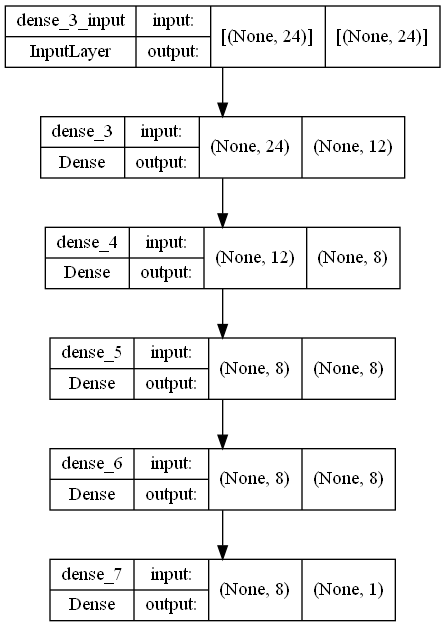

In [116]:
#visualize  model achitecture 2
plot_model(model_2, to_file= 'model_2.png', show_shapes = True)

In [117]:
model_2_proba = keras_classifier_2.predict_proba(X_test)
model_2_proba

4/4 [==============================] - 0s 2ms/step


array([[9.99986112e-01, 1.39136118e-05],
       [9.99987364e-01, 1.26389950e-05],
       [9.99987364e-01, 1.26389950e-05],
       [9.99987364e-01, 1.26389950e-05],
       [9.99987364e-01, 1.26389950e-05],
       [9.99987364e-01, 1.26394771e-05],
       [1.26361847e-05, 9.99987364e-01],
       [9.99987364e-01, 1.26405621e-05],
       [9.99987364e-01, 1.26389950e-05],
       [1.26361847e-05, 9.99987364e-01],
       [1.26957893e-05, 9.99987304e-01],
       [1.26957893e-05, 9.99987304e-01],
       [1.34706497e-05, 9.99986529e-01],
       [9.99987364e-01, 1.26390187e-05],
       [1.26957893e-05, 9.99987304e-01],
       [9.99987364e-01, 1.26389950e-05],
       [9.99987364e-01, 1.26399837e-05],
       [1.26361847e-05, 9.99987364e-01],
       [9.99987364e-01, 1.26389950e-05],
       [1.26957893e-05, 9.99987304e-01],
       [9.99987364e-01, 1.26390678e-05],
       [1.26361847e-05, 9.99987364e-01],
       [1.27553940e-05, 9.99987245e-01],
       [9.99987364e-01, 1.26389950e-05],
       [1.263618

In [118]:
model_2_pred = keras_classifier_2.predict(X_test)
model_2_pred

4/4 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [119]:
print(classification_report(y_test, model_2_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.98      1.00      0.99        43

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



# Model 3

In [120]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy


# create model
model_3 = Sequential()
model_3.add(Dense(12, input_dim=24, activation='tanh'))
model_3.add(Dense(8, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))
# Compile model
model_3.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])


# fix random seed for reproducibility
seed = 7

# create model
keras_classifier_3 = KerasClassifier(model_3, epochs=100, batch_size=64)

keras_classifier_3 = keras_classifier_3.fit(X_train, y_train)

# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
response_3 = cross_val_score(keras_classifier_3, X_train, y_train, cv=kfold)
#print(response_3)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.2573
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7640 - accuracy: 0.3567
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.4942
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6228
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6959
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.7222
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.7778
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8216
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.8509
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.8509
Epoch 11/100
6/6 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9870
Epoch 67/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9870
Epoch 68/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9870
Epoch 69/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9870
Epoch 70/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9870
Epoch 71/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9870
Epoch 72/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9870
Epoch 73/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9870
Epoch 74/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9870
Epoch 75/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9870
Epoch 76/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.9805
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9805
Epoch 32/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9805
Epoch 33/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9805
Epoch 34/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9838
Epoch 35/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9838
Epoch 36/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9838
Epoch 37/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9838
Epoch 38/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9838
Epoch 39/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9838
Epoch 40/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9935
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9935
Epoch 97/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9935
Epoch 98/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9935
Epoch 99/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9935
Epoch 100/100
1/1 [==============================] - 0s 52ms/step
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpbkikt6kd\assets
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9838
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9838
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9838
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0940 -

5/5 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9870
Epoch 60/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9870
Epoch 61/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9870
Epoch 62/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9870
Epoch 63/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9870
Epoch 64/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9870
Epoch 65/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9903
Epoch 66/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9903
Epoch 67/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9903
Epoch 68/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9903
Epoch 69/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9805
Epoch 24/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9805
Epoch 25/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9805
Epoch 26/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9805
Epoch 27/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.9805
Epoch 28/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9805
Epoch 29/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9805
Epoch 30/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9838
Epoch 31/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9838
Epoch 32/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9838
Epoch 33/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9903
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9935
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9935
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9935
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9935
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9935
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9935
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9935
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9935
Epoch 97/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9935
Epoch 98/100
5/5 [===============

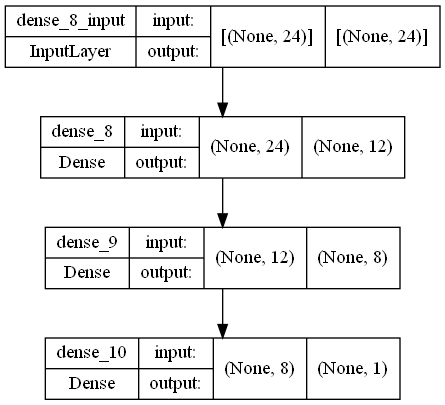

In [121]:
# visualize model architecture 3

plot_model(model_3, to_file= 'model_3.png', show_shapes = True)

In [122]:
model_3_proba = keras_classifier_3.predict_proba(X_test)
model_3_proba

2/2 [==============================] - 0s 2ms/step


array([[0.6021303 , 0.3978697 ],
       [0.96339524, 0.03660479],
       [0.97085154, 0.02914843],
       [0.98608285, 0.01391715],
       [0.9779358 , 0.02206418],
       [0.969659  , 0.030341  ],
       [0.02576804, 0.97423196],
       [0.5314374 , 0.46856263],
       [0.98877   , 0.01122999],
       [0.04610944, 0.95389056],
       [0.03920019, 0.9607998 ],
       [0.0497421 , 0.9502579 ],
       [0.15236402, 0.847636  ],
       [0.95904136, 0.04095864],
       [0.02904803, 0.970952  ],
       [0.982334  , 0.01766595],
       [0.2743799 , 0.7256201 ],
       [0.10927677, 0.8907232 ],
       [0.97648036, 0.02351964],
       [0.08386678, 0.9161332 ],
       [0.8865452 , 0.11345485],
       [0.08691275, 0.91308725],
       [0.02734494, 0.97265506],
       [0.92624825, 0.07375175],
       [0.05035198, 0.949648  ],
       [0.04512215, 0.95487785],
       [0.0387556 , 0.9612444 ],
       [0.02902508, 0.9709749 ],
       [0.03248847, 0.96751153],
       [0.8231492 , 0.17685083],
       [0.

In [123]:
model_3_pred = keras_classifier_3.predict(X_test)
model_3_pred

2/2 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [124]:
print(classification_report(y_test, model_3_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        77
           1       0.88      1.00      0.93        43

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



# Model 4

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy


# create model
model_4 = Sequential()
model_4.add(Dense(12, input_dim=24, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))
# Compile model
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fix random seed for reproducibility
seed = 7

# create model
keras_classifier_4 = KerasClassifier(model_4, epochs=80, batch_size=32)

keras_classifier_4 = keras_classifier_4.fit(X_train, y_train)

# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
response_4 = cross_val_score(keras_classifier_4, X_train, y_train, cv=kfold)
#print(response_2.mean())

Epoch 1/80
11/11 [==============================] - 1s 2ms/step - loss: 0.8203 - accuracy: 0.4444
Epoch 2/80
11/11 [==============================] - 0s 2ms/step - loss: 0.7072 - accuracy: 0.5848
Epoch 3/80
11/11 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.6725
Epoch 4/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7836
Epoch 5/80
11/11 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.8363
Epoch 6/80
11/11 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8626
Epoch 7/80
11/11 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8830
Epoch 8/80
11/11 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8860
Epoch 9/80
11/11 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8977
Epoch 10/80
11/11 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.9006
Epoch 11/80
11/11 [

Epoch 3/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 4/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 5/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 6/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 7/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 8/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 9/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 10/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 11/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 12/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 13/80
10/10

10/10 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 6/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 7/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 8/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 9/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 10/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 11/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 12/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 13/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 14/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 15/80
10/10 [=======

10/10 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 8/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 9/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 10/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 11/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 12/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 13/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 14/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 15/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 16/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 17/80
10/10 [=====

10/10 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 10/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 11/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 12/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 13/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 14/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 15/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 16/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 17/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 18/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 19/80
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 12/80
10/10 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 13/80
10/10 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 14/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 15/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 16/80
10/10 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 17/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 18/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 19/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 20/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 21/80
10/10 [===

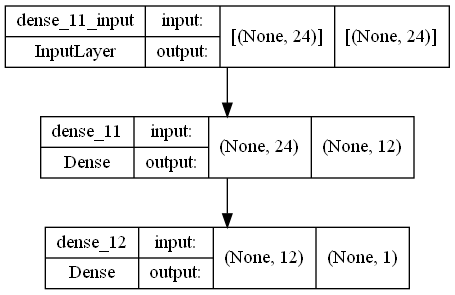

In [126]:
# visualize model architecture 3

plot_model(model_4, to_file= 'model_4.png', show_shapes = True)

In [127]:
model_4_proba = keras_classifier_4.predict_proba(X_test)
model_4_proba

4/4 [==============================] - 0s 2ms/step


array([[9.6603537e-01, 3.3964634e-02],
       [9.9990731e-01, 9.2689726e-05],
       [9.9885553e-01, 1.1444688e-03],
       [9.9992287e-01, 7.7139332e-05],
       [9.9786234e-01, 2.1376610e-03],
       [9.9801248e-01, 1.9875169e-03],
       [1.1291504e-03, 9.9887085e-01],
       [9.5459688e-01, 4.5403153e-02],
       [9.9992448e-01, 7.5535587e-05],
       [6.0809851e-03, 9.9391901e-01],
       [6.3101053e-03, 9.9368989e-01],
       [2.8444529e-03, 9.9715555e-01],
       [1.0342896e-01, 8.9657104e-01],
       [9.9777091e-01, 2.2291243e-03],
       [9.3984604e-04, 9.9906015e-01],
       [9.9995077e-01, 4.9237002e-05],
       [8.2811910e-01, 1.7188090e-01],
       [4.6253920e-02, 9.5374608e-01],
       [9.9991846e-01, 8.1547667e-05],
       [3.9336085e-02, 9.6066391e-01],
       [9.8818791e-01, 1.1812091e-02],
       [2.2737861e-02, 9.7726214e-01],
       [1.0588765e-03, 9.9894112e-01],
       [9.9781996e-01, 2.1800399e-03],
       [3.9783716e-03, 9.9602163e-01],
       [5.5028796e-03, 9.

In [128]:
model_4_pred = keras_classifier_4.predict(X_test)
model_4_pred

4/4 [==============================] - 0s 1ms/step


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [129]:
print(classification_report(y_test, model_4_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.98      1.00      0.99        43

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [130]:
# Adding cross val score results of all neural networks into a list
ANN_list = [response, response_2, response_3, response_4]

In [131]:
# print ann list
ANN_list

[array([1.        , 0.97142857, 1.        , 1.        , 1.        ,
        0.97058824, 1.        , 1.        , 1.        , 1.        ]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 0.94285714, 1.        , 0.97058824, 1.        ,
        1.        , 0.97058824, 1.        , 1.        , 1.        ]),
 array([1.        , 0.94285714, 1.        , 1.        , 1.        ,
        0.97058824, 1.        , 1.        , 1.        , 1.        ])]

In [132]:
# converting the list into a dataframe
ANN_df = pd.DataFrame(list(map(np.ravel, ANN_list))).T


# assigning column names
ANN_df.columns = ['ANN_1', 'ANN_2', 'ANN_3', 'ANN_4']


ANN_df

ANN_1  ANN_2     ANN_3     ANN_4
0  1.000000    1.0  1.000000  1.000000
1  0.971429    1.0  0.942857  0.942857
2  1.000000    1.0  1.000000  1.000000
3  1.000000    1.0  0.970588  1.000000
4  1.000000    1.0  1.000000  1.000000
5  0.970588    1.0  1.000000  0.970588
6  1.000000    1.0  0.970588  1.000000
7  1.000000    1.0  1.000000  1.000000
8  1.000000    1.0  1.000000  1.000000
9  1.000000    1.0  1.000000  1.000000

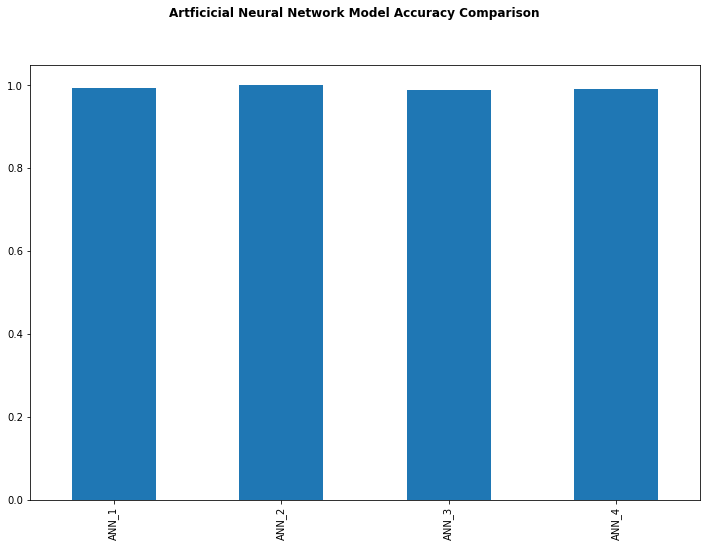

In [133]:
# plotting cross val score accuracy of all for neural network architecture
fig = plt.figure(figsize=(12,8))
fig.suptitle('Artificial Neural Network Model Accuracy Comparison', fontweight="bold")
ANN_df.mean().plot(kind="bar")
plt.show()

In [134]:
ANN_df.describe().T

count      mean       std       min       25%  50%  75%  max
ANN_1   10.0  0.994202  0.012226  0.970588  1.000000  1.0  1.0  1.0
ANN_2   10.0  1.000000  0.000000  1.000000  1.000000  1.0  1.0  1.0
ANN_3   10.0  0.988403  0.020140  0.942857  0.977941  1.0  1.0  1.0
ANN_4   10.0  0.991345  0.019383  0.942857  1.000000  1.0  1.0  1.0

# Hypothesis Testing
### Hypothesis Test 3

In [135]:
# applying repeated measure anova on the overall table
pg.rm_anova(ANN_df.iloc[0:, 0:4])

Source  ddof1  ddof2         F     p-unc      np2       eps
0  Within      3     27  1.797198  0.171508  0.16645  0.672684

* Result: P-value of the ANN cross value score prediction results is 0.171508, this means fail to test rejects Null

### Hypothesis Test 4:
#### Combining all 4 ANN accuracies in a pairwise groups 
* This gives six(6) combinations in total

In [136]:
import itertools
s = itertools.combinations(ANN_df, 2)
s = list(s)
print(s)

[('ANN_1', 'ANN_2'), ('ANN_1', 'ANN_3'), ('ANN_1', 'ANN_4'), ('ANN_2', 'ANN_3'), ('ANN_2', 'ANN_4'), ('ANN_3', 'ANN_4')]


#### Conducting 6 family wise tests to compare pvalue with a correction test (Bonferroni Correction)

In [137]:
anntest_1 = stats.ttest_ind(ANN_df["ANN_1"], ANN_df["ANN_2"])
anntest_2 = stats.ttest_ind(ANN_df["ANN_1"], ANN_df["ANN_3"])
anntest_3 = stats.ttest_ind(ANN_df["ANN_1"], ANN_df["ANN_4"])
anntest_4 = stats.ttest_ind(ANN_df["ANN_2"], ANN_df["ANN_3"])
anntest_5 = stats.ttest_ind(ANN_df["ANN_2"], ANN_df["ANN_4"])
anntest_6 = stats.ttest_ind(ANN_df["ANN_3"], ANN_df["ANN_4"])

print('ANN_1', 'ANN_2: ', anntest_1)
print('ANN_1', 'ANN_3: ', anntest_2)
print('ANN_1', 'ANN_4: ', anntest_3)
print('ANN_2', 'ANN_3: ', anntest_4)
print('ANN_2', 'ANN_4: ', anntest_5)
print('ANN_3', 'ANN_4: ', anntest_6)

ANN_1 ANN_2:  Ttest_indResult(statistic=-1.499803126352664, pvalue=0.15100105912401665)
ANN_1 ANN_3:  Ttest_indResult(statistic=0.7782559864082127, pvalue=0.4465284001496608)
ANN_1 ANN_4:  Ttest_indResult(statistic=0.39426639261548113, pvalue=0.6980164160299707)
ANN_2 ANN_3:  Ttest_indResult(statistic=1.8208403581939347, pvalue=0.0852973575920581)
ANN_2 ANN_4:  Ttest_indResult(statistic=1.4121371334993453, pvalue=0.1749648530007166)
ANN_3 ANN_4:  Ttest_indResult(statistic=-0.3327436529404571, pvalue=0.7431718265260125)


In [138]:
# print p-value of each ttests
annpv = [anntest_1[1], anntest_2[1], anntest_3[1], anntest_4[1], anntest_5[1], anntest_6[1]]
annpv

[0.15100105912401665,
 0.4465284001496608,
 0.6980164160299707,
 0.0852973575920581,
 0.1749648530007166,
 0.7431718265260125]

# Evaluation Metrics for Neural Networks

#### ROC CURVE FOR ARTIFICIAL NEURAL NETWORK

In [143]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.


ann_1_pred = cross_val_predict(keras_classifier, X_train, y_train, cv=10)

ann_2_pred = cross_val_predict(keras_classifier_2, X_train, y_train, cv=10)

ann_3_pred = cross_val_predict(keras_classifier_3, X_train, y_train, cv=10)

ann_4_pred = cross_val_predict(keras_classifier_4, X_train, y_train, cv=10)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpweoxozk3\assets
Epoch 1/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9967
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9967
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9967
Epoch 4/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9967
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 6/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 9/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 10/150
10/10 [==

10/10 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 9/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 10/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 11/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 12/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 13/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 14/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 15/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 16/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 17/150
10

10/10 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 15/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 16/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 17/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 18/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 19/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 20/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 21/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 22/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 23/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 24/150


10/10 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 22/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 23/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 24/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 25/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 26/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 27/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 28/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 29/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 30/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 31/150


10/10 [==============================] - 0s 2ms/step - loss: 4.3774e-04 - accuracy: 1.0000
Epoch 102/150
10/10 [==============================] - 0s 2ms/step - loss: 4.3227e-04 - accuracy: 1.0000
Epoch 103/150
10/10 [==============================] - 0s 2ms/step - loss: 4.2700e-04 - accuracy: 1.0000
Epoch 104/150
10/10 [==============================] - 0s 2ms/step - loss: 4.2263e-04 - accuracy: 1.0000
Epoch 105/150
10/10 [==============================] - 0s 2ms/step - loss: 4.1583e-04 - accuracy: 1.0000
Epoch 106/150
10/10 [==============================] - 0s 2ms/step - loss: 4.1059e-04 - accuracy: 1.0000
Epoch 107/150
10/10 [==============================] - 0s 2ms/step - loss: 4.0566e-04 - accuracy: 1.0000
Epoch 108/150
10/10 [==============================] - 0s 2ms/step - loss: 4.0119e-04 - accuracy: 1.0000
Epoch 109/150
10/10 [==============================] - 0s 2ms/step - loss: 3.9569e-04 - accuracy: 1.0000
Epoch 110/150
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 4.0480e-04 - accuracy: 1.0000
Epoch 109/150
10/10 [==============================] - 0s 2ms/step - loss: 4.0099e-04 - accuracy: 1.0000
Epoch 110/150
10/10 [==============================] - 0s 2ms/step - loss: 3.9507e-04 - accuracy: 1.0000
Epoch 111/150
10/10 [==============================] - 0s 1ms/step - loss: 3.9026e-04 - accuracy: 1.0000
Epoch 112/150
10/10 [==============================] - 0s 1ms/step - loss: 3.8556e-04 - accuracy: 1.0000
Epoch 113/150
10/10 [==============================] - 0s 1ms/step - loss: 3.7975e-04 - accuracy: 1.0000
Epoch 114/150
10/10 [==============================] - 0s 1ms/step - loss: 3.7716e-04 - accuracy: 1.0000
Epoch 115/150
10/10 [==============================] - 0s 1ms/step - loss: 3.7103e-04 - accuracy: 1.0000
Epoch 116/150
10/10 [==============================] - 0s 1ms/step - loss: 3.6649e-04 - accuracy: 1.0000
Epoch 117/150
10/10 [==============================] - 0s 1ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 3.6391e-04 - accuracy: 1.0000
Epoch 116/150
10/10 [==============================] - 0s 2ms/step - loss: 3.5997e-04 - accuracy: 1.0000
Epoch 117/150
10/10 [==============================] - 0s 2ms/step - loss: 3.5556e-04 - accuracy: 1.0000
Epoch 118/150
10/10 [==============================] - 0s 2ms/step - loss: 3.5159e-04 - accuracy: 1.0000
Epoch 119/150
10/10 [==============================] - 0s 2ms/step - loss: 3.4746e-04 - accuracy: 1.0000
Epoch 120/150
10/10 [==============================] - 0s 2ms/step - loss: 3.4350e-04 - accuracy: 1.0000
Epoch 121/150
10/10 [==============================] - 0s 2ms/step - loss: 3.3990e-04 - accuracy: 1.0000
Epoch 122/150
10/10 [==============================] - 0s 2ms/step - loss: 3.3568e-04 - accuracy: 1.0000
Epoch 123/150
10/10 [==============================] - 0s 2ms/step - loss: 3.3148e-04 - accuracy: 1.0000
Epoch 124/150
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 3ms/step - loss: 3.3725e-04 - accuracy: 1.0000
Epoch 122/150
10/10 [==============================] - 0s 3ms/step - loss: 3.3264e-04 - accuracy: 1.0000
Epoch 123/150
10/10 [==============================] - 0s 2ms/step - loss: 3.2865e-04 - accuracy: 1.0000
Epoch 124/150
10/10 [==============================] - 0s 3ms/step - loss: 3.2486e-04 - accuracy: 1.0000
Epoch 125/150
10/10 [==============================] - 0s 2ms/step - loss: 3.2143e-04 - accuracy: 1.0000
Epoch 126/150
10/10 [==============================] - 0s 2ms/step - loss: 3.1795e-04 - accuracy: 1.0000
Epoch 127/150
10/10 [==============================] - 0s 2ms/step - loss: 3.1428e-04 - accuracy: 1.0000
Epoch 128/150
10/10 [==============================] - 0s 2ms/step - loss: 3.1120e-04 - accuracy: 1.0000
Epoch 129/150
10/10 [==============================] - 0s 2ms/step - loss: 3.0762e-04 - accuracy: 1.0000
Epoch 130/150
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 2.3892e-04 - accuracy: 1.0000
Epoch 128/150
10/10 [==============================] - 0s 2ms/step - loss: 2.3641e-04 - accuracy: 1.0000
Epoch 129/150
10/10 [==============================] - 0s 2ms/step - loss: 2.3385e-04 - accuracy: 1.0000
Epoch 130/150
10/10 [==============================] - 0s 2ms/step - loss: 2.3118e-04 - accuracy: 1.0000
Epoch 131/150
10/10 [==============================] - 0s 2ms/step - loss: 2.2873e-04 - accuracy: 1.0000
Epoch 132/150
10/10 [==============================] - 0s 2ms/step - loss: 2.2623e-04 - accuracy: 1.0000
Epoch 133/150
10/10 [==============================] - 0s 2ms/step - loss: 2.2374e-04 - accuracy: 1.0000
Epoch 134/150
10/10 [==============================] - 0s 2ms/step - loss: 2.2124e-04 - accuracy: 1.0000
Epoch 135/150
10/10 [==============================] - 0s 2ms/step - loss: 2.1888e-04 - accuracy: 1.0000
Epoch 136/150
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 2.9319e-04 - accuracy: 1.0000
Epoch 135/150
10/10 [==============================] - 0s 2ms/step - loss: 2.9005e-04 - accuracy: 1.0000
Epoch 136/150
10/10 [==============================] - 0s 2ms/step - loss: 2.8645e-04 - accuracy: 1.0000
Epoch 137/150
10/10 [==============================] - 0s 2ms/step - loss: 2.8311e-04 - accuracy: 1.0000
Epoch 138/150
10/10 [==============================] - 0s 2ms/step - loss: 2.8009e-04 - accuracy: 1.0000
Epoch 139/150
10/10 [==============================] - 0s 2ms/step - loss: 2.7685e-04 - accuracy: 1.0000
Epoch 140/150
10/10 [==============================] - 0s 2ms/step - loss: 2.7420e-04 - accuracy: 1.0000
Epoch 141/150
10/10 [==============================] - 0s 3ms/step - loss: 2.7107e-04 - accuracy: 1.0000
Epoch 142/150
10/10 [==============================] - 0s 2ms/step - loss: 2.6831e-04 - accuracy: 1.0000
Epoch 143/150
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 2.4601e-04 - accuracy: 1.0000
Epoch 141/150
10/10 [==============================] - 0s 2ms/step - loss: 2.4368e-04 - accuracy: 1.0000
Epoch 142/150
10/10 [==============================] - 0s 2ms/step - loss: 2.4084e-04 - accuracy: 1.0000
Epoch 143/150
10/10 [==============================] - 0s 2ms/step - loss: 2.3866e-04 - accuracy: 1.0000
Epoch 144/150
10/10 [==============================] - 0s 2ms/step - loss: 2.3617e-04 - accuracy: 1.0000
Epoch 145/150
10/10 [==============================] - 0s 2ms/step - loss: 2.3369e-04 - accuracy: 1.0000
Epoch 146/150
10/10 [==============================] - 0s 2ms/step - loss: 2.3101e-04 - accuracy: 1.0000
Epoch 147/150
10/10 [==============================] - 0s 3ms/step - loss: 2.2889e-04 - accuracy: 1.0000
Epoch 148/150
10/10 [==============================] - 0s 2ms/step - loss: 2.2647e-04 - accuracy: 1.0000
Epoch 149/150
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 5.7716e-07 - accuracy: 1.0000
Epoch 45/100
10/10 [==============================] - 0s 2ms/step - loss: 5.4124e-07 - accuracy: 1.0000
Epoch 46/100
10/10 [==============================] - 0s 2ms/step - loss: 5.0769e-07 - accuracy: 1.0000
Epoch 47/100
10/10 [==============================] - 0s 2ms/step - loss: 4.7673e-07 - accuracy: 1.0000
Epoch 48/100
10/10 [==============================] - 0s 2ms/step - loss: 4.4761e-07 - accuracy: 1.0000
Epoch 49/100
10/10 [==============================] - 0s 2ms/step - loss: 4.2099e-07 - accuracy: 1.0000
Epoch 50/100
10/10 [==============================] - 0s 2ms/step - loss: 3.9575e-07 - accuracy: 1.0000
Epoch 51/100
10/10 [==============================] - 0s 2ms/step - loss: 3.7262e-07 - accuracy: 1.0000
Epoch 52/100
10/10 [==============================] - 0s 2ms/step - loss: 3.5105e-07 - accuracy: 1.0000
Epoch 53/100
10/10 [==============================] - 0s 2ms/step - loss: 3.3

10/10 [==============================] - 0s 2ms/step - loss: 4.9990e-08 - accuracy: 1.0000
Epoch 100/100
2/2 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpmrzmdi_k\assets
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.2258e-05 - accuracy: 1.0000
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1385e-05 - accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0575e-05 - accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 9.8229e-06 - accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 9.1248e-06 - accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 8.4769e-06 - accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 7.8750e-06 - accuracy: 1.0000
Epoch 8/100
10/10 [=================

10/10 [==============================] - 0s 2ms/step - loss: 3.3053e-07 - accuracy: 1.0000
Epoch 54/100
10/10 [==============================] - 0s 3ms/step - loss: 3.1210e-07 - accuracy: 1.0000
Epoch 55/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9466e-07 - accuracy: 1.0000
Epoch 56/100
10/10 [==============================] - 0s 2ms/step - loss: 2.7807e-07 - accuracy: 1.0000
Epoch 57/100
10/10 [==============================] - 0s 3ms/step - loss: 2.6288e-07 - accuracy: 1.0000
Epoch 58/100
10/10 [==============================] - 0s 2ms/step - loss: 2.4915e-07 - accuracy: 1.0000
Epoch 59/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3591e-07 - accuracy: 1.0000
Epoch 60/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2335e-07 - accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1155e-07 - accuracy: 1.0000
Epoch 62/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0

10/10 [==============================] - 0s 2ms/step - loss: 7.8752e-06 - accuracy: 1.0000
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 7.3162e-06 - accuracy: 1.0000
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 6.7976e-06 - accuracy: 1.0000
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 6.3166e-06 - accuracy: 1.0000
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 5.8699e-06 - accuracy: 1.0000
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 5.4550e-06 - accuracy: 1.0000
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 5.0703e-06 - accuracy: 1.0000
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 4.7126e-06 - accuracy: 1.0000
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 4.3806e-06 - accuracy: 1.0000
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 4.072

10/10 [==============================] - 0s 2ms/step - loss: 2.0099e-07 - accuracy: 1.0000
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9118e-07 - accuracy: 1.0000
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 1.8180e-07 - accuracy: 1.0000
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7297e-07 - accuracy: 1.0000
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6459e-07 - accuracy: 1.0000
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5664e-07 - accuracy: 1.0000
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4926e-07 - accuracy: 1.0000
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4291e-07 - accuracy: 1.0000
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 1.3683e-07 - accuracy: 1.0000
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 1.3

10/10 [==============================] - 0s 2ms/step - loss: 4.0726e-06 - accuracy: 1.0000
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 3.7864e-06 - accuracy: 1.0000
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 3.5211e-06 - accuracy: 1.0000
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 3.2748e-06 - accuracy: 1.0000
Epoch 20/100
10/10 [==============================] - 0s 2ms/step - loss: 3.0462e-06 - accuracy: 1.0000
Epoch 21/100
10/10 [==============================] - 0s 2ms/step - loss: 2.8337e-06 - accuracy: 1.0000
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 2.6365e-06 - accuracy: 1.0000
Epoch 23/100
10/10 [==============================] - 0s 2ms/step - loss: 2.4534e-06 - accuracy: 1.0000
Epoch 24/100
10/10 [==============================] - 0s 2ms/step - loss: 2.2836e-06 - accuracy: 1.0000
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 2.1

Epoch 76/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9902
Epoch 77/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9902
Epoch 78/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9902
Epoch 79/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 80/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 81/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 82/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 83/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 84/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 86/100
5/5 [==

5/5 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9870
Epoch 41/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9870
Epoch 42/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9870
Epoch 43/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.9870
Epoch 44/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9870
Epoch 45/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9870
Epoch 46/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9870
Epoch 47/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9870
Epoch 48/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9870
Epoch 49/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9870
Epoch 50/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9773
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9773
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9773
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9773
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9773
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9773
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.9773
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9773
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.9773
Epoch 13/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9773
Epoch 14/100
5/5 [====================

5/5 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9935
Epoch 70/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9935
Epoch 71/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9935
Epoch 72/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9935
Epoch 73/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9935
Epoch 74/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9935
Epoch 75/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9935
Epoch 76/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9935
Epoch 77/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9935
Epoch 78/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9935
Epoch 79/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9838
Epoch 34/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9838
Epoch 35/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9838
Epoch 36/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9838
Epoch 37/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9838
Epoch 38/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9838
Epoch 39/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9838
Epoch 40/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9838
Epoch 41/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9838
Epoch 42/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9870
Epoch 43/100
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9903
Epoch 99/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9903
Epoch 100/100
1/1 [==============================] - 0s 56ms/step
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp92a3ep4u\assets
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9773
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9773
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9773
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9773
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9773
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9773
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0955 - ac

10/10 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 62/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 63/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 64/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 65/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 66/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 67/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 68/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 69/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 70/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 71/80
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 64/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 65/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 66/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 67/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 68/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 69/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 70/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 71/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 72/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 73/80
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 66/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 67/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 68/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 69/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 70/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 71/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 72/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 73/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 74/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 75/80
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 68/80
10/10 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 69/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 70/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 71/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 72/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 73/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 74/80
10/10 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 75/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 76/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 77/80
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 70/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 71/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 72/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 73/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 74/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 75/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 76/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 77/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 78/80
10/10 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 79/80
10/10 [===

4/4 [==============================] - 0s 2ms/step


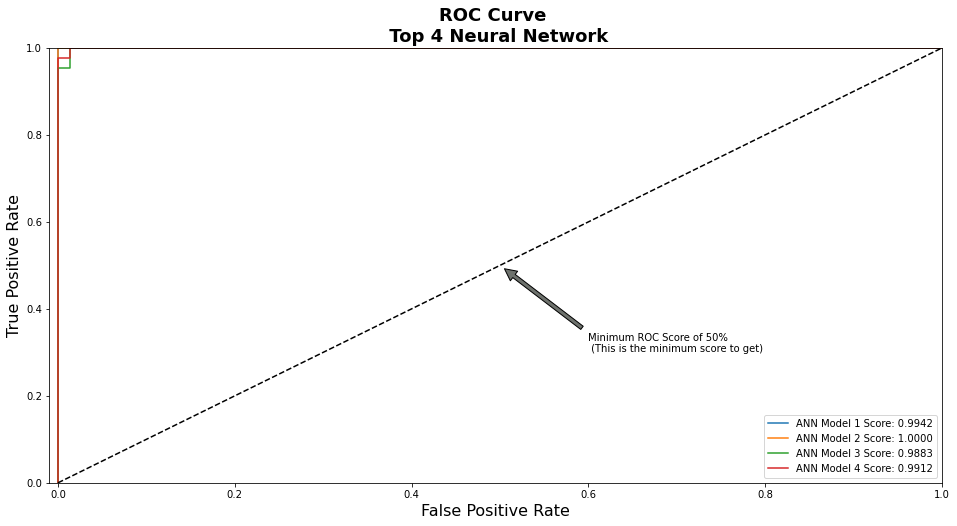

In [144]:
ann_1_fpr2, ann_1_tpr2, ann_1_threshold = roc_curve(y_test, keras_classifier.predict_proba(X_test)[:,1])
ann_2_fpr2, ann_2_tpr2, ann_2_threshold = roc_curve(y_test, keras_classifier_2.predict_proba(X_test)[:,1])
ann_3_fpr2, ann_3_tpr2, ann_3_threshold = roc_curve(y_test, keras_classifier_3.predict_proba(X_test)[:,1])
ann_4_fpr2, ann_4_tpr2, ann_4_threshold = roc_curve(y_test, keras_classifier_4.predict_proba(X_test)[:,1])


def graph_roc_curve_multiple(ann_1_fpr2, ann_1_tpr2, ann_2_fpr2, ann_2_tpr2, ann_3_fpr2, ann_3_tpr2, ann_4_fpr2, ann_4_tpr2):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Neural Network', fontsize=18, fontweight="bold")
    plt.plot(ann_1_fpr2, ann_1_tpr2, label='ANN Model 1 Score: {:.4f}'.format(roc_auc_score(y_train, ann_1_pred)))
    plt.plot(ann_2_fpr2, ann_2_tpr2, label='ANN Model 2 Score: {:.4f}'.format(roc_auc_score(y_train, ann_2_pred)))
    plt.plot(ann_3_fpr2, ann_3_tpr2, label='ANN Model 3 Score: {:.4f}'.format(roc_auc_score(y_train, ann_3_pred)))
    plt.plot(ann_4_fpr2, ann_4_tpr2, label='ANN Model 4 Score: {:.4f}'.format(roc_auc_score(y_train, ann_4_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(ann_1_fpr2, ann_1_tpr2, ann_2_fpr2, ann_2_tpr2, ann_3_fpr2, ann_3_tpr2, ann_4_fpr2, ann_4_tpr2,)
plt.show()

In [145]:
def fxn_roc_curve(ann_2_fpr2, ann_2_tpr2, title):
    plt.figure(figsize=(12,8))
    plt.title(title, fontsize=16, fontweight="bold")
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16, fontweight="bold")
    plt.ylabel('True Positive Rate', fontsize=16, fontweight="bold")
    plt.axis([-0.01,1,0,1])

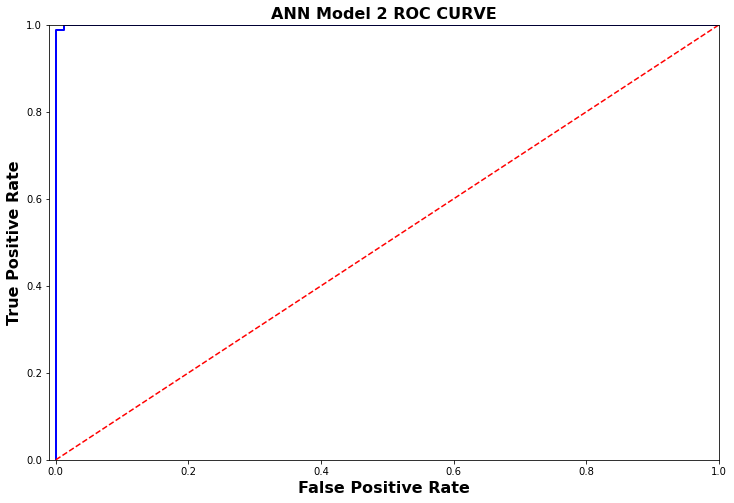

In [146]:
fxn_roc_curve(ann_2_fpr2, ann_2_tpr2, 'ANN Model 2 ROC CURVE')
plt.show()

# Precision Recall Curve

4/4 [==============================] - 0s 2ms/step


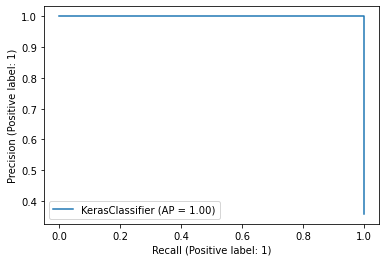

In [147]:
from sklearn.metrics import PrecisionRecallDisplay

disp_confusion = PrecisionRecallDisplay.from_estimator(keras_classifier_2,
                                                       X_test,
                                                       y_test) 

In [148]:
# calculating the roc auc score
from sklearn.metrics import roc_auc_score

print('ANN MODEL ROC_AUC_SCORE 1: ', roc_auc_score(y_train, ann_1_pred))
print('ANN MODEL ROC_AUC_SCORE 2: ', roc_auc_score(y_train, ann_2_pred))
print('ANN MODEL ROC_AUC_SCORE 3: ', roc_auc_score(y_train, ann_3_pred))
print('ANN MODEL ROC_AUC_SCORE 4: ', roc_auc_score(y_train, ann_4_pred))

ANN MODEL ROC_AUC_SCORE 1:  0.9941520467836258
ANN MODEL ROC_AUC_SCORE 2:  1.0
ANN MODEL ROC_AUC_SCORE 3:  0.9883040935672515
ANN MODEL ROC_AUC_SCORE 4:  0.9912280701754386


## Comparing the ANN Model Results to the Supervised Learning Algorithm Results

### Statistical Testing

In [149]:
# Copying supervised learning accuracies to a new placeholder
result_data = Cvresult_df
result_data

Logistics_Regression  Kernel_SVM   XGBoost  Random_Forest
0              1.000000    1.000000  1.000000            1.0
1              1.000000    1.000000  0.971429            1.0
2              1.000000    0.970588  1.000000            1.0
3              0.941176    0.941176  0.970588            1.0
4              0.970588    0.941176  1.000000            1.0
5              1.000000    1.000000  0.911765            1.0
6              1.000000    1.000000  0.970588            1.0
7              1.000000    1.000000  1.000000            1.0
8              1.000000    1.000000  0.970588            1.0
9              1.000000    1.000000  0.970588            1.0

In [150]:
# adding ANN 1, 2, 3, 4 to the result table in preparation for the overall hypothesis testing
result_data["ANN_1"] = ANN_df["ANN_1"]
result_data["ANN_2"] = ANN_df["ANN_2"]
result_data["ANN_3"] = ANN_df["ANN_3"]
result_data["ANN_4"] = ANN_df["ANN_4"]

In [151]:
result_data.head()

Logistics_Regression  Kernel_SVM   XGBoost  Random_Forest     ANN_1  ANN_2  \
0              1.000000    1.000000  1.000000            1.0  1.000000    1.0   
1              1.000000    1.000000  0.971429            1.0  0.971429    1.0   
2              1.000000    0.970588  1.000000            1.0  1.000000    1.0   
3              0.941176    0.941176  0.970588            1.0  1.000000    1.0   
4              0.970588    0.941176  1.000000            1.0  1.000000    1.0   

      ANN_3     ANN_4  
0  1.000000  1.000000  
1  0.942857  0.942857  
2  1.000000  1.000000  
3  0.970588  1.000000  
4  1.000000  1.000000

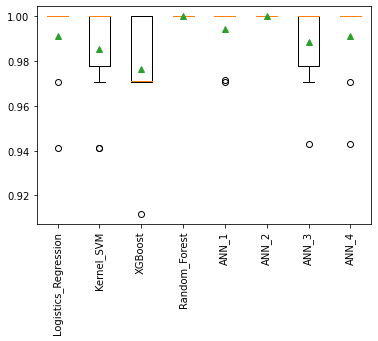

In [152]:
plt.boxplot(result_data, labels=result_data.columns, showmeans=True)
plt.xticks(rotation=90)
plt.show()

# Anova

In [153]:
# applying repeated measure anova on the overall table
pg.rm_anova(result_data.iloc[0:, 0:9])

Source  ddof1  ddof2         F     p-unc       np2       eps
0  Within      7     63  2.014144  0.067067  0.182869  0.345573

## All pair combinations of the new table


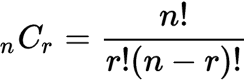

n= 28 <br>
r = 8

In [154]:
combo_results = itertools.combinations(result_data, 2)
combo_results = list(combo_results)
print("The total number of combination is: ", len(combo_results))
print(combo_results)

The total number of combination is:  28
[('Logistics_Regression', 'Kernel_SVM'), ('Logistics_Regression', 'XGBoost'), ('Logistics_Regression', 'Random_Forest'), ('Logistics_Regression', 'ANN_1'), ('Logistics_Regression', 'ANN_2'), ('Logistics_Regression', 'ANN_3'), ('Logistics_Regression', 'ANN_4'), ('Kernel_SVM', 'XGBoost'), ('Kernel_SVM', 'Random_Forest'), ('Kernel_SVM', 'ANN_1'), ('Kernel_SVM', 'ANN_2'), ('Kernel_SVM', 'ANN_3'), ('Kernel_SVM', 'ANN_4'), ('XGBoost', 'Random_Forest'), ('XGBoost', 'ANN_1'), ('XGBoost', 'ANN_2'), ('XGBoost', 'ANN_3'), ('XGBoost', 'ANN_4'), ('Random_Forest', 'ANN_1'), ('Random_Forest', 'ANN_2'), ('Random_Forest', 'ANN_3'), ('Random_Forest', 'ANN_4'), ('ANN_1', 'ANN_2'), ('ANN_1', 'ANN_3'), ('ANN_1', 'ANN_4'), ('ANN_2', 'ANN_3'), ('ANN_2', 'ANN_4'), ('ANN_3', 'ANN_4')]


In [155]:
# RUNNING T-TEST FOR ALL 28 COMBINATIONS
comb_test_1  = stats.ttest_ind(result_data["Logistics_Regression"], result_data["Kernel_SVM"])
comb_test_2  = stats.ttest_ind(result_data["Logistics_Regression"], result_data["XGBoost"])
comb_test_3  = stats.ttest_ind(result_data["Logistics_Regression"], result_data["Random_Forest"])
comb_test_4  = stats.ttest_ind(result_data["Logistics_Regression"], result_data["ANN_1"])
comb_test_5  = stats.ttest_ind(result_data["Logistics_Regression"], result_data["ANN_2"])
comb_test_6  = stats.ttest_ind(result_data["Logistics_Regression"], result_data["ANN_3"])
comb_test_7  = stats.ttest_ind(result_data["Logistics_Regression"], result_data["ANN_4"])

comb_test_8  = stats.ttest_ind(result_data["Kernel_SVM"], result_data["XGBoost"])
comb_test_9  = stats.ttest_ind(result_data["Kernel_SVM"], result_data["Random_Forest"])
comb_test_10  = stats.ttest_ind(result_data["Kernel_SVM"], result_data["ANN_1"])
comb_test_11  = stats.ttest_ind(result_data["Kernel_SVM"], result_data["ANN_2"])
comb_test_12  = stats.ttest_ind(result_data["Kernel_SVM"], result_data["ANN_3"])
comb_test_13  = stats.ttest_ind(result_data["Kernel_SVM"], result_data["ANN_4"])


comb_test_14 = stats.ttest_ind(result_data["XGBoost"], result_data["Random_Forest"])
comb_test_15 = stats.ttest_ind(result_data["XGBoost"], result_data["ANN_1"])
comb_test_16 = stats.ttest_ind(result_data["XGBoost"], result_data["ANN_2"])
comb_test_17 = stats.ttest_ind(result_data["XGBoost"], result_data["ANN_3"])
comb_test_18 = stats.ttest_ind(result_data["XGBoost"], result_data["ANN_4"])


comb_test_19 = stats.ttest_ind(result_data["Random_Forest"], result_data["ANN_1"])
comb_test_20 = stats.ttest_ind(result_data["Random_Forest"], result_data["ANN_2"])
comb_test_21 = stats.ttest_ind(result_data["Random_Forest"], result_data["ANN_3"])
comb_test_22 = stats.ttest_ind(result_data["Random_Forest"], result_data["ANN_4"])

comb_test_23 = stats.ttest_ind(result_data["ANN_1"], result_data["ANN_2"])
comb_test_24 = stats.ttest_ind(result_data["ANN_1"], result_data["ANN_3"])
comb_test_25 = stats.ttest_ind(result_data["ANN_1"], result_data["ANN_4"])

comb_test_26 = stats.ttest_ind(result_data["ANN_2"], result_data["ANN_3"])
comb_test_27 = stats.ttest_ind(result_data["ANN_2"], result_data["ANN_4"])

comb_test_28 = stats.ttest_ind(result_data["ANN_3"], result_data["ANN_4"])

In [156]:
# PRINTING THE 28 T-TEST RESULTS
print('Logistics_Regression', 'Kernel_SVM: ', comb_test_1)
print('Logistics_Regression', 'XGBoost: ', comb_test_2)
print('Logistics_Regression', 'Random_Forest: ', comb_test_3)
print('Logistics_Regression', 'ANN_1: ', comb_test_4)
print('Logistics_Regression', 'ANN_2: ', comb_test_5)
print('Logistics_Regression', 'ANN_3: ', comb_test_6)
print('Logistics_Regression', 'ANN_4: ', comb_test_7)

print('Kernel_SVM', 'XGBoost: ', comb_test_8)
print('Kernel_SVM', 'Random_Forest: ', comb_test_9)
print('Kernel_SVM', 'ANN_1: ', comb_test_10)
print('Kernel_SVM', 'ANN_2: ', comb_test_11)
print('Kernel_SVM', 'ANN_3: ', comb_test_12)
print('Kernel_SVM', 'ANN_4: ', comb_test_13)

print('XGBoost', 'Random_Forest: ', comb_test_14)
print('XGBoost', 'ANN_1: ', comb_test_15)
print('XGBoost', 'ANN_2: ', comb_test_16)
print('XGBoost', 'ANN_3: ', comb_test_17)
print('XGBoost', 'ANN_4: ', comb_test_18)

print('Random_Forest', 'ANN_1: ', comb_test_19)
print('Random_Forest', 'ANN_2: ', comb_test_20)
print('Random_Forest', 'ANN_3: ', comb_test_21)
print('Random_Forest', 'ANN_4: ', comb_test_22)

print('ANN_1', 'ANN_2: ', comb_test_23)
print('ANN_1', 'ANN_3: ', comb_test_24)
print('ANN_1', 'ANN_4: ', comb_test_25)

print('ANN_2', 'ANN_3: ', comb_test_26)
print('ANN_2', 'ANN_4: ', comb_test_27)

print('ANN_3', 'ANN_4: ', comb_test_28)

Logistics_Regression Kernel_SVM:  Ttest_indResult(statistic=0.5827715174143564, pvalue=0.5672768905605596)
Logistics_Regression XGBoost:  Ttest_indResult(statistic=1.379456762474782, pvalue=0.1846523362782072)
Logistics_Regression Random_Forest:  Ttest_indResult(statistic=-1.4055638569974491, pvalue=0.1768796480794021)
Logistics_Regression ANN_1:  Ttest_indResult(statistic=-0.41033505730628006, pvalue=0.6864031056427393)
Logistics_Regression ANN_2:  Ttest_indResult(statistic=-1.4055638569974491, pvalue=0.1768796480794021)
Logistics_Regression ANN_3:  Ttest_indResult(statistic=0.3101011355333623, pvalue=0.7600457003855934)
Logistics_Regression ANN_4:  Ttest_indResult(statistic=-0.01915593990482275, pvalue=0.9849274506114954)
Kernel_SVM XGBoost:  Ttest_indResult(statistic=0.7510031299808704, pvalue=0.46235686953014077)
Kernel_SVM Random_Forest:  Ttest_indResult(statistic=-1.86052101883812, pvalue=0.07922998223566365)
Kernel_SVM ANN_1:  Ttest_indResult(statistic=-1.0123384985591029, pvalu

# Bonferroni Test

In [157]:
# 28 is the number og group combinations
Bonferrini_corrected_alpha = 0.05/28
print('The new alpha is: ', Bonferrini_corrected_alpha)

# 4.7% is the new alpha
new_FWER = 1 - (1 - Bonferrini_corrected_alpha)**28
print(new_FWER)

The new alpha is:  0.0017857142857142859
0.0488130907705423


In [158]:
combo_pv = [comb_test_1[1], comb_test_2[1], comb_test_3[1], 
            comb_test_4[1], comb_test_5[1], comb_test_6[1], 
            comb_test_7[1], comb_test_8[1], comb_test_9[1], 
            comb_test_10[1], comb_test_11[1], comb_test_12[1], 
            comb_test_13[1], comb_test_14[1], comb_test_15[1], 
            comb_test_16[1], comb_test_17[1], comb_test_18[1], 
            comb_test_19[1], comb_test_20[1], comb_test_21[1], 
            comb_test_22[1], comb_test_23[1], comb_test_24[1], 
            comb_test_25[1], comb_test_26[1], comb_test_27[1], comb_test_28[1]]
combo_pv


#checking the new alpha(0.001 against) the pvalues
combo_result_data = pd.DataFrame(combo_pv, columns=['p-value'])

for i in (combo_result_data.values):
    if i <= Bonferrini_corrected_alpha:
            print("Test rejects H0 and accepts H1", i)
            
    else:
        print("Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001")

Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.001
Tests fails to reject Null H

#### Statistical Testing comparing Kernel Support Vector Machine and Neural Network 2 using McNemar's Test

* H0 hypothesis (Null Hypothesis) : There is no difference in the mean accuracy of the ANN and supervised KSVM results.
* Alternative H1 hypothesis : The difference is significance
* p-value(0.05) - The smaller the pvalue, the more confident we are of the null hypothesis being false
* if the reported pvalue are below 0.05, then we can reject the H0.

* The test is widely used in medicine to compare the effect of a treatment against a control.

* Below is the contigency table we are trying to achive
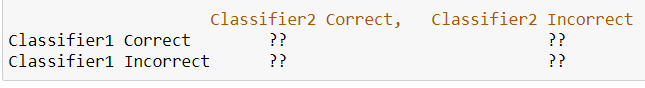
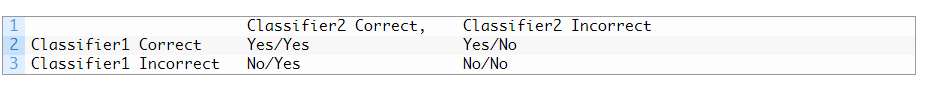

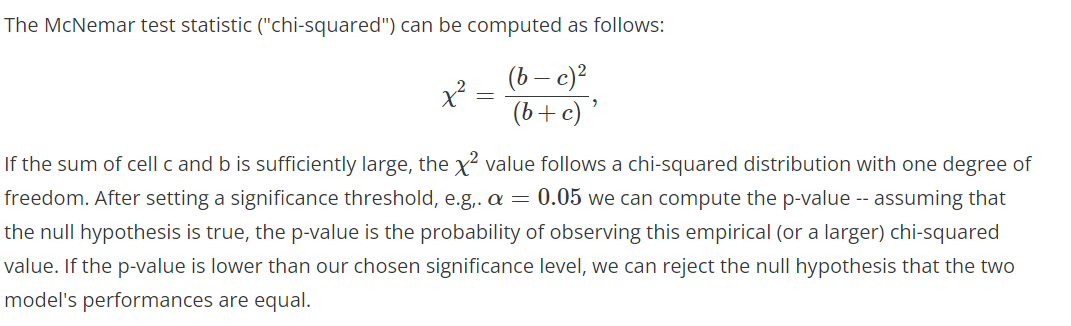

In [159]:
from statsmodels.stats.contingency_tables import mcnemar

In [161]:
# encoding to categorical variables to values according to prediction
class_1 = []
for linenum, line in enumerate(zip(prediction_RF, y_test)):
    if line[0] == line[1]:
        class_1.append("Yes")
    else:
        class_1.append("No")

In [162]:
class_1

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes']

In [163]:
# Reshaping model 1 prediction of ANN test result to 1 dim
model2_pred = model_2_pred.reshape(-1)
model2_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [164]:
for linenum, line in enumerate(zip(model2_pred, y_test)):
    print(line)

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)


In [165]:
class_2 = []
for linenum, line in enumerate(zip(model2_pred, y_test)):
    if line[0] == line[1]:
        class_2.append("Yes")
    else:
        class_2.append("No")

In [166]:
class_2

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes']

In [167]:
# pandas Datadaframe from lists using zip.

import pandas as pd


# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(class_1, class_2))

# Assign data to tuples.
list_of_tuples


# Converting lists of tuples into
# pandas Dataframe.
contigency_table = pd.DataFrame(list_of_tuples,
                                columns=['classifier_1', 'classifier_2'])

# Print data.
contigency_table


classifier_1 classifier_2
0            Yes          Yes
1            Yes          Yes
2            Yes          Yes
3            Yes          Yes
4            Yes          Yes
..           ...          ...
115          Yes          Yes
116          Yes          Yes
117          Yes          Yes
118          Yes          Yes
119          Yes          Yes

[120 rows x 2 columns]

In [168]:
# classifier 1 has 120 correct prediction and 0 incorrect prediction
print("incorrect prediction: ", len(contigency_table[contigency_table["classifier_1"] == "No"]))
print("correct prediction: ", len(contigency_table[contigency_table["classifier_1"] == "Yes"]))

incorrect prediction:  0
correct prediction:  120


In [169]:
# classifier 2 has 120 correct prediction and 0 incorrect prediction
print("incorrect prediction: ", len(contigency_table[contigency_table["classifier_2"] == "No"]))
print("correct prediction: ", len(contigency_table[contigency_table["classifier_2"] == "Yes"]))

incorrect prediction:  1
correct prediction:  119


In [170]:
# identifying values that are correct and incorrect in both
class_3 = []
for linenum, line in enumerate(zip(contigency_table["classifier_1"], contigency_table["classifier_2"])):
    if line[0] == line[1]:
        class_3.append("Yes")
    else:
        class_3.append("No")

In [171]:
class_3

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes']

In [172]:
# cadding class 3 to the dataframe
contigency_table["class_3"] = class_3

In [173]:
# classifier 2 has 120 correct prediction and 0 incorrect prediction
print("incorrect prediction: ", len(contigency_table[contigency_table["class_3"] == "No"]))
print("correct prediction: ", len(contigency_table[contigency_table["class_3"] == "Yes"]))

incorrect prediction:  1
correct prediction:  119


In [174]:
# Investigating variations
# if "classifier_2" = Yes and classifier_2 = No == 0
# if "classifier_2" = No and classifier_2 = No == 0
for linenum, line in enumerate(zip(contigency_table["classifier_1"], contigency_table["classifier_2"])):
    if line[1] == "Yes" and line[0] == "No":
        print(line)
    if line[1] == "No" and line[0] == "NO":
        print(line)
        

In [175]:
#dropping the class_3 column
contigency_table = contigency_table.drop(["class_3"], axis = 1)

Reject Null Hypothesis: Classifiers have the same proportion of errors on the test set.

In [176]:
from statsmodels.stats.contingency_tables import mcnemar

table = [[119, 1],
         [0, 0]]
# calculate mcnemar test
the_test = mcnemar(table, exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (the_test.statistic, the_test.pvalue))
# interpret the p-value
alpha = 0.05
if the_test.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

statistic=0.000, p-value=1.000
Same proportions of errors (fail to reject H0)


# t-test

* classifier_1 == Random forest predictions<br>
* classifier_2 == Artificial Intelligence(Model 2)

In [177]:
# label encoding categorical columns to binary for prepare for pairwise ttest operation
contigency_table["classifier_1"] = contigency_table["classifier_1"].map({"No":0, "Yes":1})
contigency_table["classifier_2"] = contigency_table["classifier_2"].map({"No":0, "Yes":1})

In [178]:
stats.ttest_ind(a=contigency_table["classifier_1"], b=contigency_table["classifier_2"])

Ttest_indResult(statistic=0.9999999999999962, pvalue=0.3183261228871959)

### Report: The pvalue is greater than 0.05 which means we will fail to reject H0.
* This means we can choose to use any of our Kernel Support Vector Machine Model or Artificial Neural Network Model as both will give the same output during testing

# Deployment

To make a single prediction using PCA in our model development, this may involves fitting a Pipeline on all available data and using the pipeline to make predictions on new data. Importantly, the same transform must be performed on this new data, which is handled automatically via the Pipeline.

### Saving Model

In [184]:
import pickle

file = open('ckd_RFF.pkl', 'wb')

pickle.dump(model_RFF, file)

file.close()

In [191]:
#saving the scaler
import pickle

pickle.dump(sc,open('scaling.pkl','wb'))

In [185]:
test_np_input = [[40,80,1.025,0,0,1,1,0,0,140,10,1.2,135,5,15,48,10400,4.5,0,0,0,0,0,0]]

In [186]:
thismodel = pickle.load(open('ckd_RFF.pkl', 'rb'))
predss = thismodel.predict(sc.transform(test_np_input))
preds_as_st = str(predss)
preds_as_st

'[1]'

# References

Pypi, (2022). “Scikit-Learn Wrapper for Keras”. Available at: [KerasClassifier](https://www.adriangb.com/scikeras/stable/migration.html)
[Accessed 20 July 2022]. 
<br>
<br>
Soundara Pandian, Jerlin Rubini, Eswaran Perumal, (2015). Chronic_Kidney_Disease Data Set. UCI Machine Learning Repository Irvine, CA: University of California, School of Information and Computer Science. Available at: https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease [Accessed 3 May 2022].
<br>
<br>
Jason Brownlee, (2018). “How to Use ROC Curves and Precision-Recall Curves for Classification in Python”.Available at: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
 [Accessed 03 May 2022].
<br>
<br>
Jason Brownlee, (2018). “How to Calculate McNemar’s Test to Compare Two Machine Learning Classifiers”.Available at: https://machinelearningmastery.com/mcnemars-test-for-machine-learning/ [Accessed 15 June 2022].
<br>
<br>
Muhammad Fahad Zafar, (2017). “Convert-Arff-to-CSV”.Available at: 
https://github.com/mfahadzafar/Convert-Arff-to-CSV/blob/master/arffToCsv.py [Accessed 03 May 2022]
<br>
Simone Centellegher, (2020). “How to compute PCA loadings and the loading matrix with scikit-learn” Available at: https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html [Accessed 15 July 2022].
<br>
<br>
Pypi, (2022). “Scikit-Learn Wrapper for Keras”. Available at: https://www.adriangb.com/scikeras/stable/migration.html [Accessed 20 July 2022].
<br>
<br>
Kim S, Lee W. (2017 ). “Does McNemar’s test compare the sensitivities and specificities of the two diagnostic tests?” Statistical Methods in Medical Research.;26(1):142-154. doi:10.1177/0962280214541852